# PART 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

%matplotlib inline 

In [2]:
p1data_1=pd.read_csv(r'C:\Users\ascd0\Downloads\Part1 - Normal.csv')
p1data_2=pd.read_csv(r'C:\Users\ascd0\Downloads\Part1 - Type_H.csv')
p1data_3=pd.read_csv(r'C:\Users\ascd0\Downloads\Part1 - Type_S.csv')

In [3]:
p1data_1.head(5)

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

In [4]:
print(p1data_1.shape)
print(p1data_2.shape)
print(p1data_3.shape)

(100, 7)
(60, 7)
(150, 7)


In [5]:
p1data_1['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [6]:
print(p1data_1['Class'].unique())
print(p1data_2['Class'].unique())
print(p1data_3['Class'].unique())

['Normal' 'Nrmal']
['Type_H' 'type_h']
['Type_S' 'tp_s']


#From above we can understand class variable data has different values.Lets clear it to unique value

In [7]:
p1data_1['Class']='Normal'
p1data_2['Class']='Type_H'
p1data_3['Class']='Type_S'

In [8]:
print(p1data_1['Class'].value_counts())
print(p1data_2['Class'].value_counts())
print(p1data_3['Class'].value_counts())

Normal    100
Name: Class, dtype: int64
Type_H    60
Name: Class, dtype: int64
Type_S    150
Name: Class, dtype: int64


In [9]:
#Merge all datasets into single
p1data = pd.DataFrame()
p1data=p1data.append(p1data_1)
p1data=p1data.append(p1data_2)
p1data=p1data.append(p1data_3)

In [10]:
p1data.head(5)

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

In [11]:
p1data['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [12]:
#datatypes are Float and Object
p1data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [13]:
p1data.isnull().sum()
#We dont have any null values in data and special chars such as * or ? in data

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [14]:
print(p1data.mean())
#centre of gravity of data can be located as below

P_incidence     60.496653
P_tilt          17.542822
L_angle         51.930930
S_slope         42.953831
P_radius       117.920655
S_Degree        26.296694
dtype: float64


In [15]:
p1data['P_radius'].mode()
#all the values are of different. Same frequency are not there.

0       70.082575
1       78.999454
2       81.024541
3       82.456038
4       84.241415
          ...    
305    147.894637
306    148.525562
307    151.839857
308    157.848799
309    163.071041
Length: 310, dtype: float64

In [16]:
p1data['P_incidence'].mode()
#all the values are of different. Same frequency are not there.

0       26.147921
1       30.149936
2       30.741938
3       31.232387
4       31.276012
          ...    
305     95.480229
306     96.657315
307    115.923261
308    118.144655
309    129.834041
Length: 310, dtype: float64

In [17]:
#By lookng at data below S_Degree column has high skewness in data
p1data.describe()

P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082

In [18]:
p1data.median()

P_incidence     58.691038
P_tilt          16.357689
L_angle         49.562398
S_slope         42.404912
P_radius       118.268178
S_Degree        11.767934
dtype: float64

if the mean is Greater than mode or median then data is positively skewed.
if the mean is lower then mode or meadian then data is negatively skewed

From Mean and median not able to figure the exact skewness.

In [19]:
# 25% quantile f data
p1data.quantile(q=0.25)
#out of P_incidence value 129(max)...25% people hav less than P_incidence value as 46
#P_radisus value 163(MAX).....25% people have less than 110 value
#S_Degree value 418(Max)....25% people have less than 1.

P_incidence     46.430294
P_tilt          10.667069
L_angle         37.000000
S_slope         33.347122
P_radius       110.709196
S_Degree         1.603727
Name: 0.25, dtype: float64

In [20]:
#50% quantile f data
p1data.quantile(q=0.50)
#out of P_incidence value 129(max)...25% people hav less than P_incidence value as 46 and 50% have less than 58 value
#P_radisus value 163(MAX).....25% people have less than 110 value and 50% have less than 118 value
#S_Degree value 418(Max)....25% people have less than 1 and 50% have less than 11 value.

P_incidence     58.691038
P_tilt          16.357689
L_angle         49.562398
S_slope         42.404912
P_radius       118.268178
S_Degree        11.767934
Name: 0.5, dtype: float64

In [21]:
#5 number summary of data
p1data.describe().T

count        mean        std        min         25%         50%  \
P_incidence  310.0   60.496653  17.236520  26.147921   46.430294   58.691038   
P_tilt       310.0   17.542822  10.008330  -6.554948   10.667069   16.357689   
L_angle      310.0   51.930930  18.554064  14.000000   37.000000   49.562398   
S_slope      310.0   42.953831  13.423102  13.366931   33.347122   42.404912   
P_radius     310.0  117.920655  13.317377  70.082575  110.709196  118.268178   
S_Degree     310.0   26.296694  37.559027 -11.058179    1.603727   11.767934   

                    75%         max  
P_incidence   72.877696  129.834041  
P_tilt        22.120395   49.431864  
L_angle       63.000000  125.742385  
S_slope       52.695888  121.429566  
P_radius     125.467674  163.071041  
S_Degree      41.287352  418.543082

#From above we can understand dataset has 310 obervations with 7 varaibles.Target varible is class.Minimum values of variable is non-
#zero means we have values present for all varaibles.Variance among different predictor variable is varying at medium scale , Scaling data will be helpful for Predective modelling

<AxesSubplot:>

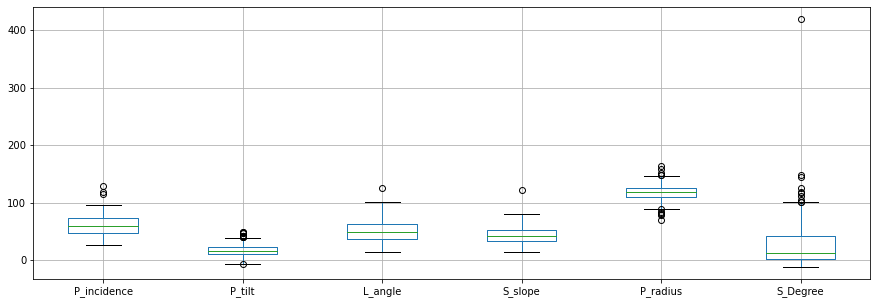

In [22]:
p1data.boxplot(figsize=(15,5))

#From above we can undestand we have few outliers in data for all columns. S_Degree column is postive skewed as most data exists on right side

cols=list(p1data)[0:-1]
p1data[cols].hist(stacked=False,bins=100,figsize=(12,30),layout=(14,2));

In [23]:
#P_incidence - Major people values are range of 30 t0 90
#P_tilt- Major people have values range of 5 to 25
#L_angle - major people have values in range of 25 to 80
#S_slope - major people have values in range of 25 to 70
#P_radius - major people have values in range of 90 to 140
#S_degree - major people have values in range of 0 to 60 and S_degree has min value of -11 and max of 418 with std of 37 and mean of 26.
#seems data is righty skwed. Lets go visualizaiton to confirm

C:\Users\ascd0\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


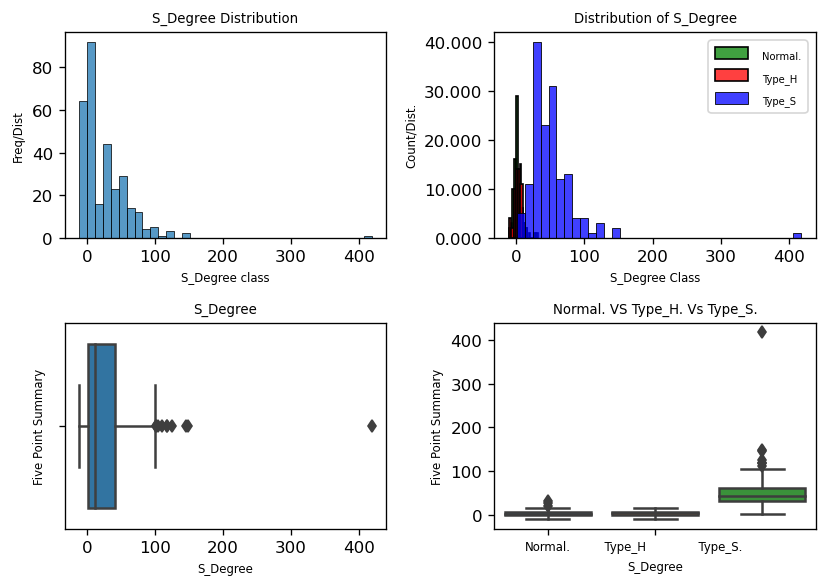

In [24]:
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (7,5))

plot10 = sns.histplot(p1data['S_Degree'],ax=axes[0][0])
axes[0][0].set_title('S_Degree Distribution',fontdict={'fontsize':8})
axes[0][0].set_xlabel('S_Degree class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.histplot(p1data[p1data['Class']=='Normal']['S_Degree'],ax=axes[0][1],color='green',label='Normal.')
sns.histplot(p1data[p1data.Class=='Type_H']['S_Degree'],ax=axes[0][1],color='red',label='Type_H')
sns.histplot(p1data[p1data.Class=='Type_S']['S_Degree'],ax=axes[0][1],color='blue',label='Type_S')
axes[0][1].set_title('Distribution of S_Degree',fontdict={'fontsize':8})
axes[0][1].set_xlabel('S_Degree Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot20 = sns.boxplot(x=p1data['S_Degree'],ax=axes[1][0],orient='v')
axes[1][0].set_title('S_Degree',fontdict={'fontsize':8})
axes[1][0].set_xlabel('S_Degree',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

plot21 = sns.boxplot(x='Class',y='S_Degree',data=p1data,ax=axes[1][1])
axes[1][1].set_title('Normal. VS Type_H. Vs Type_S.',fontdict={'fontsize':8})
axes[1][1].set_xlabel('S_Degree',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Normal.','          Type_H              Type_S.'],fontsize=7)
plt.tight_layout()
plt.show()

In [25]:
#From above we can understand S_Degree data is unimodel but right skewed with lot of outliers.Type_s Class has higher spread of values
#from Box plot can undestand people with higher S_Degree has type_S problem

C:\Users\ascd0\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


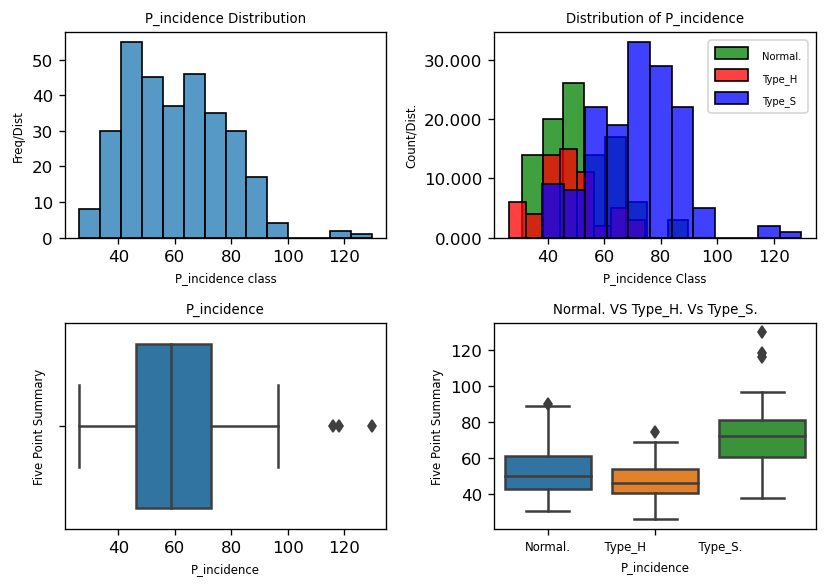

In [26]:
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (7,5))

plot10 = sns.histplot(p1data['P_incidence'],ax=axes[0][0])
axes[0][0].set_title('P_incidence Distribution',fontdict={'fontsize':8})
axes[0][0].set_xlabel('P_incidence class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.histplot(p1data[p1data['Class']=='Normal']['P_incidence'],ax=axes[0][1],color='green',label='Normal.')
sns.histplot(p1data[p1data.Class=='Type_H']['P_incidence'],ax=axes[0][1],color='red',label='Type_H')
sns.histplot(p1data[p1data.Class=='Type_S']['P_incidence'],ax=axes[0][1],color='blue',label='Type_S')
axes[0][1].set_title('Distribution of P_incidence',fontdict={'fontsize':8})
axes[0][1].set_xlabel('P_incidence Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot20 = sns.boxplot(x=p1data['P_incidence'],ax=axes[1][0],orient='v')
axes[1][0].set_title('P_incidence',fontdict={'fontsize':8})
axes[1][0].set_xlabel('P_incidence',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

plot21 = sns.boxplot(x='Class',y='P_incidence',data=p1data,ax=axes[1][1])
axes[1][1].set_title('Normal. VS Type_H. Vs Type_S.',fontdict={'fontsize':8})
axes[1][1].set_xlabel('P_incidence',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Normal.','          Type_H              Type_S.'],fontsize=7)
plt.tight_layout()
plt.show()

In [27]:
#from above we can understand P_incidence data is close to unimodel and there are some outliers present.
#among output classes, Type_S have higher P_incidence spread from box plot can understand higher P_incidence can lead to Type_S problem

C:\Users\ascd0\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


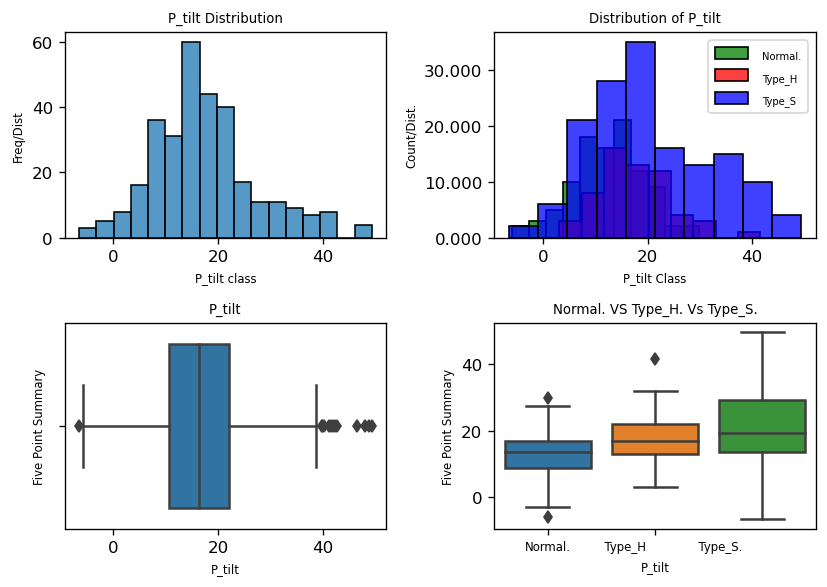

In [28]:
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (7,5))

plot10 = sns.histplot(p1data['P_tilt'],ax=axes[0][0])
axes[0][0].set_title('P_tilt Distribution',fontdict={'fontsize':8})
axes[0][0].set_xlabel('P_tilt class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.histplot(p1data[p1data['Class']=='Normal']['P_tilt'],ax=axes[0][1],color='green',label='Normal.')
sns.histplot(p1data[p1data.Class=='Type_H']['P_tilt'],ax=axes[0][1],color='red',label='Type_H')
sns.histplot(p1data[p1data.Class=='Type_S']['P_tilt'],ax=axes[0][1],color='blue',label='Type_S')
axes[0][1].set_title('Distribution of P_tilt',fontdict={'fontsize':8})
axes[0][1].set_xlabel('P_tilt Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot20 = sns.boxplot(x=p1data['P_tilt'],ax=axes[1][0],orient='v')
axes[1][0].set_title('P_tilt',fontdict={'fontsize':8})
axes[1][0].set_xlabel('P_tilt',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

plot21 = sns.boxplot(x='Class',y='P_tilt',data=p1data,ax=axes[1][1])
axes[1][1].set_title('Normal. VS Type_H. Vs Type_S.',fontdict={'fontsize':8})
axes[1][1].set_xlabel('P_tilt',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Normal.','          Type_H              Type_S.'],fontsize=7)
plt.tight_layout()
plt.show()

In [29]:
# P_tilt data is unimodel and roughy bell shaped with central tendecncy lot of outliers are present.
#among output classes, Type_S have higher spread and from box plot can understand people with higher p_Tilt have type_S class problem

C:\Users\ascd0\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


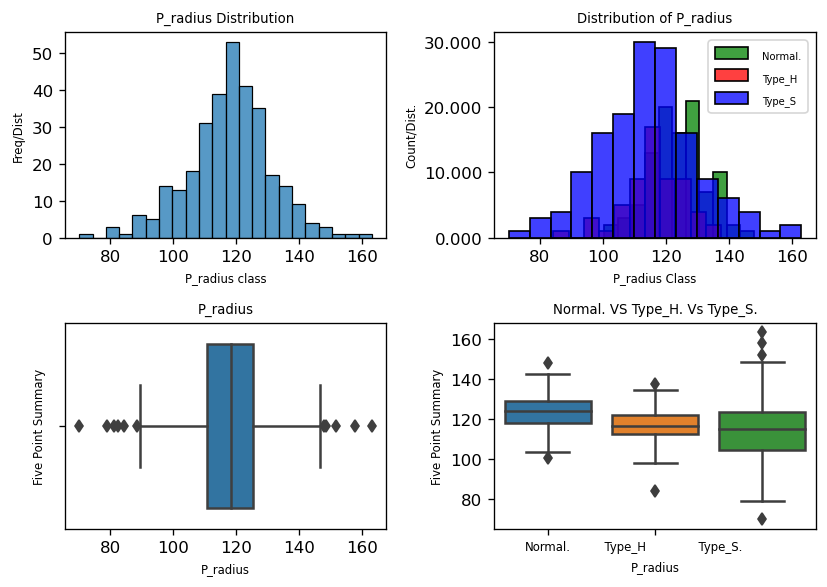

In [30]:
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (7,5))

plot10 = sns.histplot(p1data['P_radius'],ax=axes[0][0])
axes[0][0].set_title('P_radius Distribution',fontdict={'fontsize':8})
axes[0][0].set_xlabel('P_radius class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.histplot(p1data[p1data['Class']=='Normal']['P_radius'],ax=axes[0][1],color='green',label='Normal.')
sns.histplot(p1data[p1data.Class=='Type_H']['P_radius'],ax=axes[0][1],color='red',label='Type_H')
sns.histplot(p1data[p1data.Class=='Type_S']['P_radius'],ax=axes[0][1],color='blue',label='Type_S')
axes[0][1].set_title('Distribution of P_radius',fontdict={'fontsize':8})
axes[0][1].set_xlabel('P_radius Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot20 = sns.boxplot(x=p1data['P_radius'],ax=axes[1][0],orient='v')
axes[1][0].set_title('P_radius',fontdict={'fontsize':8})
axes[1][0].set_xlabel('P_radius',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

plot21 = sns.boxplot(x='Class',y='P_radius',data=p1data,ax=axes[1][1])
axes[1][1].set_title('Normal. VS Type_H. Vs Type_S.',fontdict={'fontsize':8})
axes[1][1].set_xlabel('P_radius',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Normal.','          Type_H              Type_S.'],fontsize=7)
plt.tight_layout()
plt.show()

P_Radius Distribution is normal and bell shaped with data centered at 110 and most data lied in range of 90 to 140.
from box plot can understand higher value of P_radius can lead to Type_S

*== Joint plot of P_radius with Other Variables ==* 

Correlation between P_radius and P_incidence ==>  -0.2474672059226942


<Figure size 500x400 with 0 Axes>

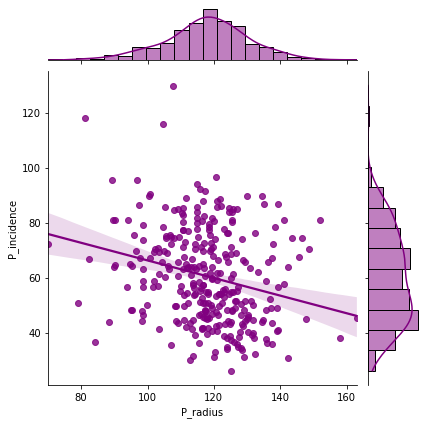

Correlation between P_radius and P_tilt ==>  0.032667812828522796


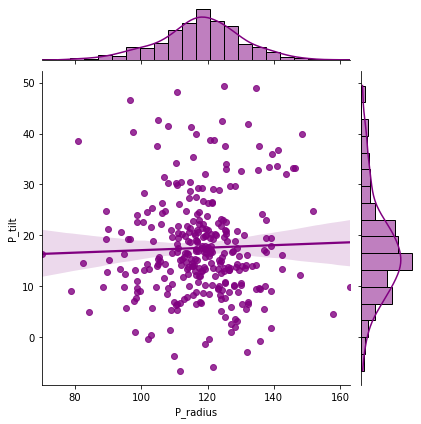

Correlation between P_radius and L_angle ==>  -0.08034360945420715


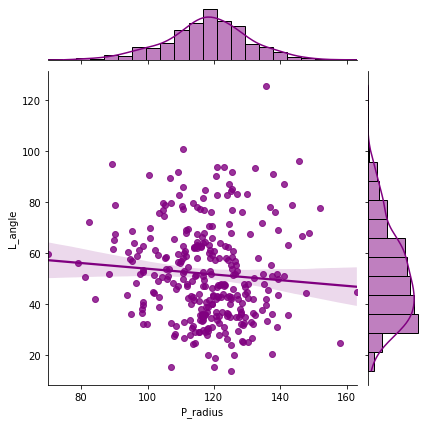

Correlation between P_radius and S_slope ==>  -0.34212834910432677


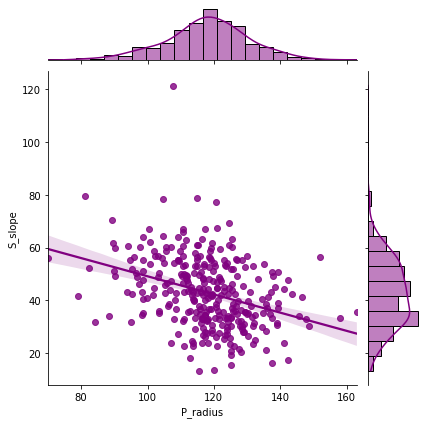

Correlation between P_radius and S_Degree ==>  -0.026065006625284312


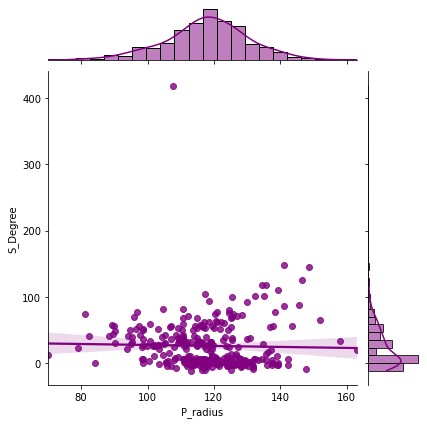

In [31]:
plt.figure(dpi = 100, figsize = (5,4))
print("*== Joint plot of P_radius with Other Variables ==* \n")
for i in  p1data.columns:
    if i != 'P_radius' and i != 'Class':
        print(f"Correlation between P_radius and {i} ==> ",p1data.corr().loc['P_radius'][i])
        sns.jointplot(x='P_radius',y=i,data=p1data,kind = 'reg',color = 'purple')
        plt.show()

P_incidence shows negative co-relation with all other variables except P_tilt

with increase of P_incidence all other varaibles decrease except P_tilt(This will increase along with P_radius)

*== Joint plot of L_angle with Other Variables ==* 

Correlation between L_angle and P_incidence ==>  0.7172823642740493


<Figure size 500x400 with 0 Axes>

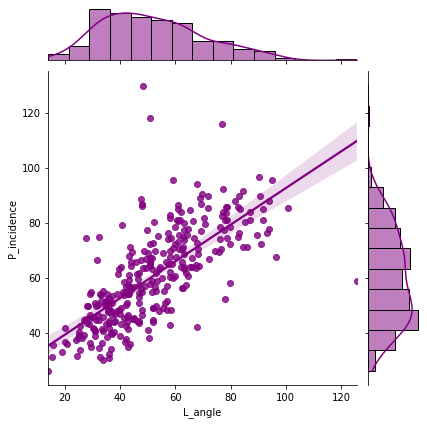

Correlation between L_angle and P_tilt ==>  0.4327638644481518


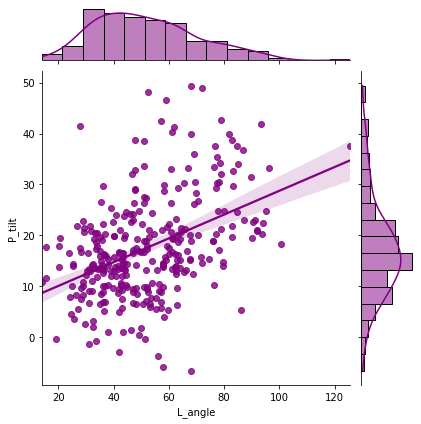

Correlation between L_angle and S_slope ==>  0.5983868907766202


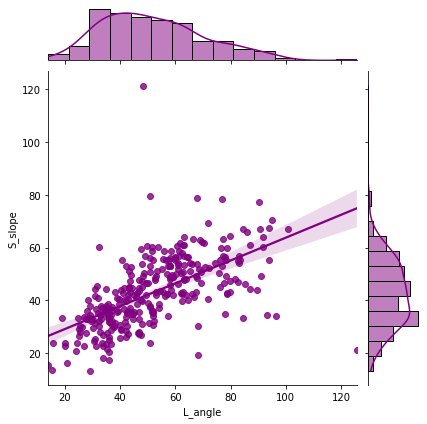

Correlation between L_angle and P_radius ==>  -0.08034360945420715


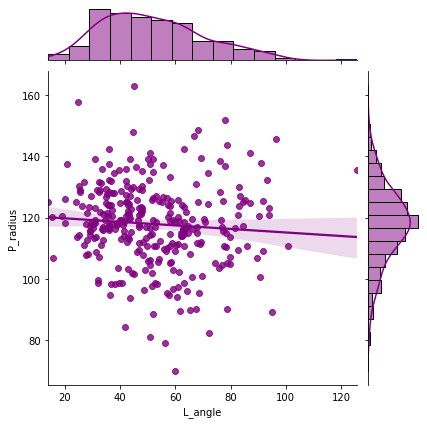

Correlation between L_angle and S_Degree ==>  0.5336670125088709


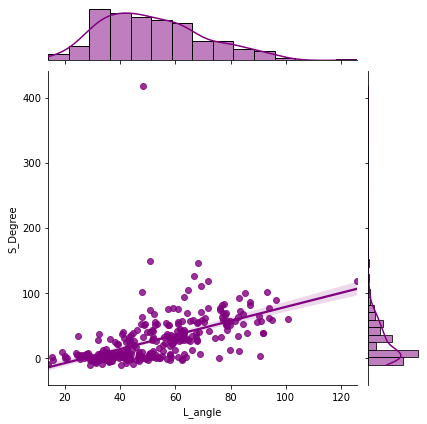

In [32]:
plt.figure(dpi = 100, figsize = (5,4))
print("*== Joint plot of L_angle with Other Variables ==* \n")
for i in  p1data.columns:
    if i != 'L_angle' and i != 'Class':
        print(f"Correlation between L_angle and {i} ==> ",p1data.corr().loc['L_angle'][i])
        sns.jointplot(x='L_angle',y=i,data=p1data,kind = 'reg',color = 'purple')
        plt.show()

L_angle shows positive co-relation with all other variables except P_radius

with increase of L_angle all other varaibles increase and  P_radius will decrease

*== Joint plot of S_slope with Other Variables ==* 

Correlation between S_slope and P_incidence ==>  0.7172823642740493


<Figure size 500x400 with 0 Axes>

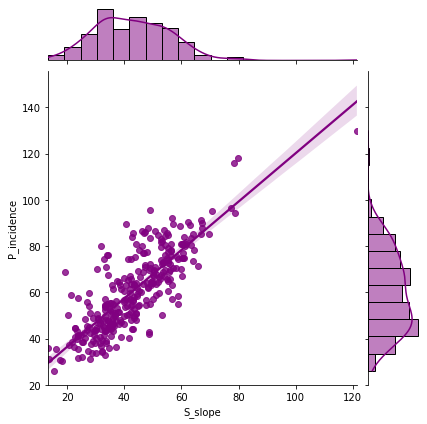

Correlation between S_slope and P_tilt ==>  0.4327638644481518


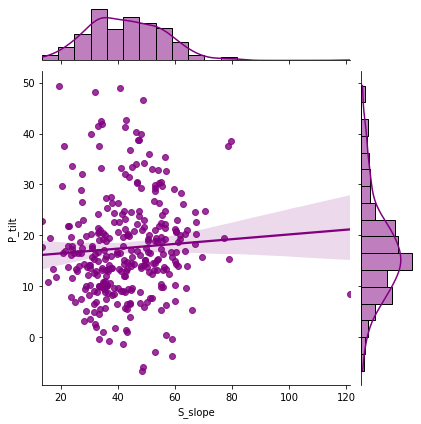

Correlation between S_slope and L_angle ==>  1.0


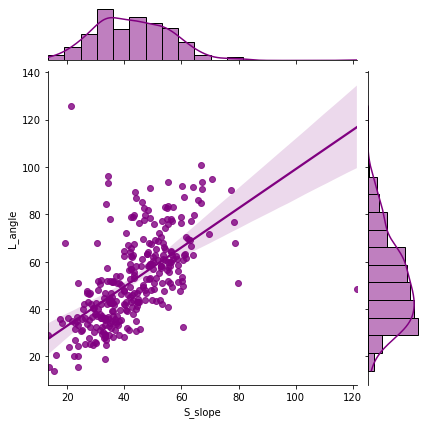

Correlation between S_slope and P_radius ==>  -0.08034360945420715


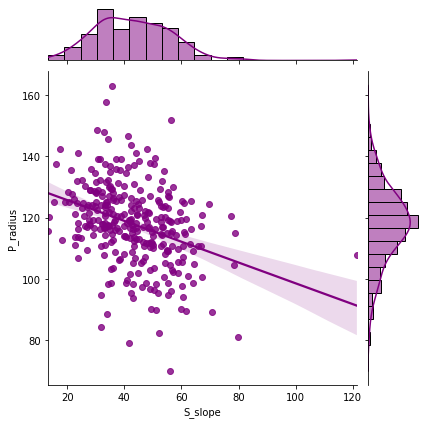

Correlation between S_slope and S_Degree ==>  0.5336670125088709


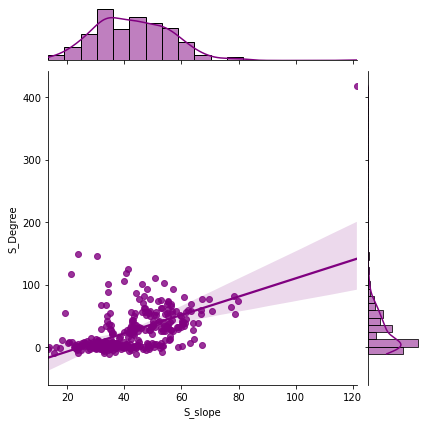

In [33]:
plt.figure(dpi = 100, figsize = (5,4))
print("*== Joint plot of S_slope with Other Variables ==* \n")
for i in  p1data.columns:
    if i != 'S_slope' and i != 'Class':
        print(f"Correlation between S_slope and {i} ==> ",p1data.corr().loc['L_angle'][i])
        sns.jointplot(x='S_slope',y=i,data=p1data,kind = 'reg',color = 'purple')
        plt.show()

S_slope shows positive co-relation with all other variables except P_radius

with increase of S_slope all other varaibles increase and  P_radius will decrease

<Figure size 720x480 with 0 Axes>

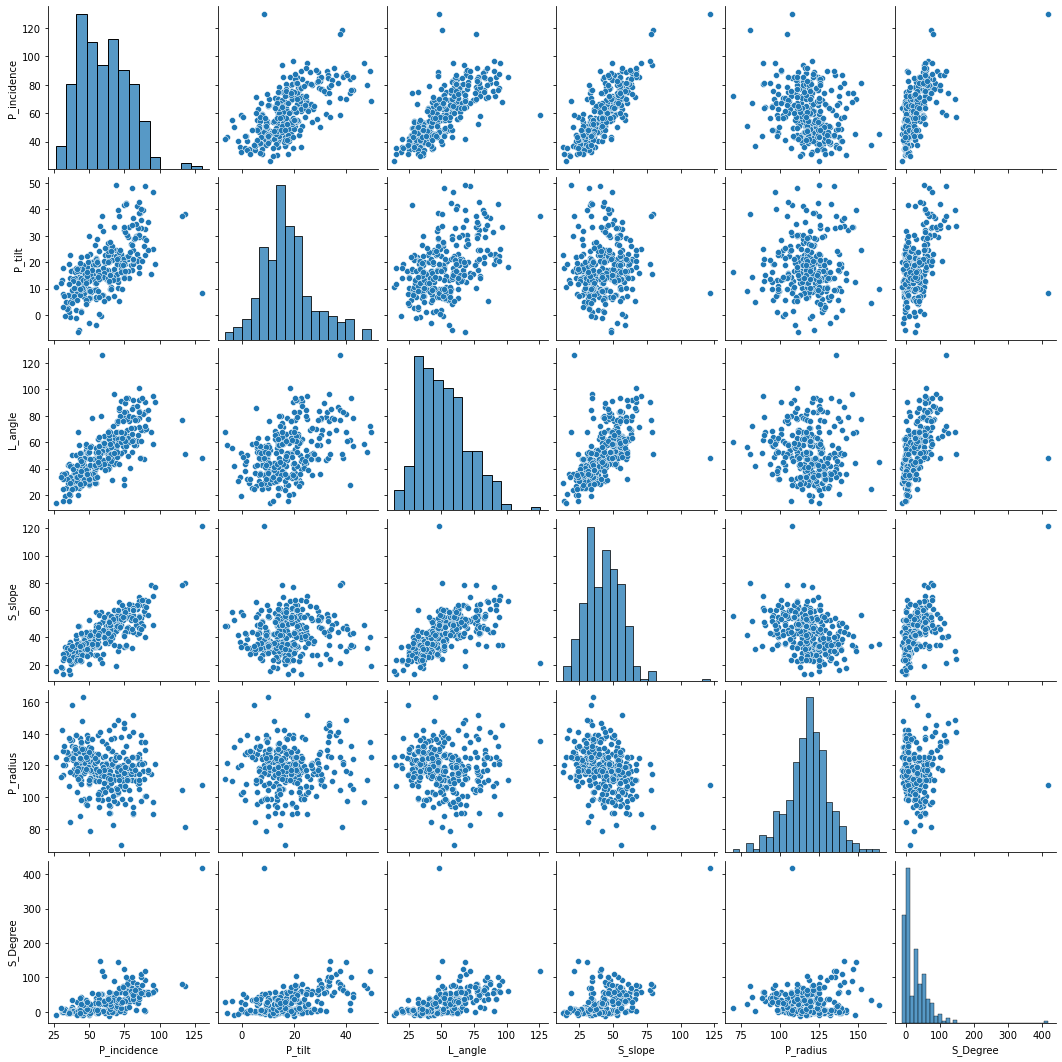

In [34]:
plt.figure(dpi=120)
sns.pairplot(p1data)
plt.show()

From above we can understand P_incidence P_tilt L_angle S_slope are corerleated with each other.
S_degree data is heavily right skewed

<Figure size 720x480 with 0 Axes>

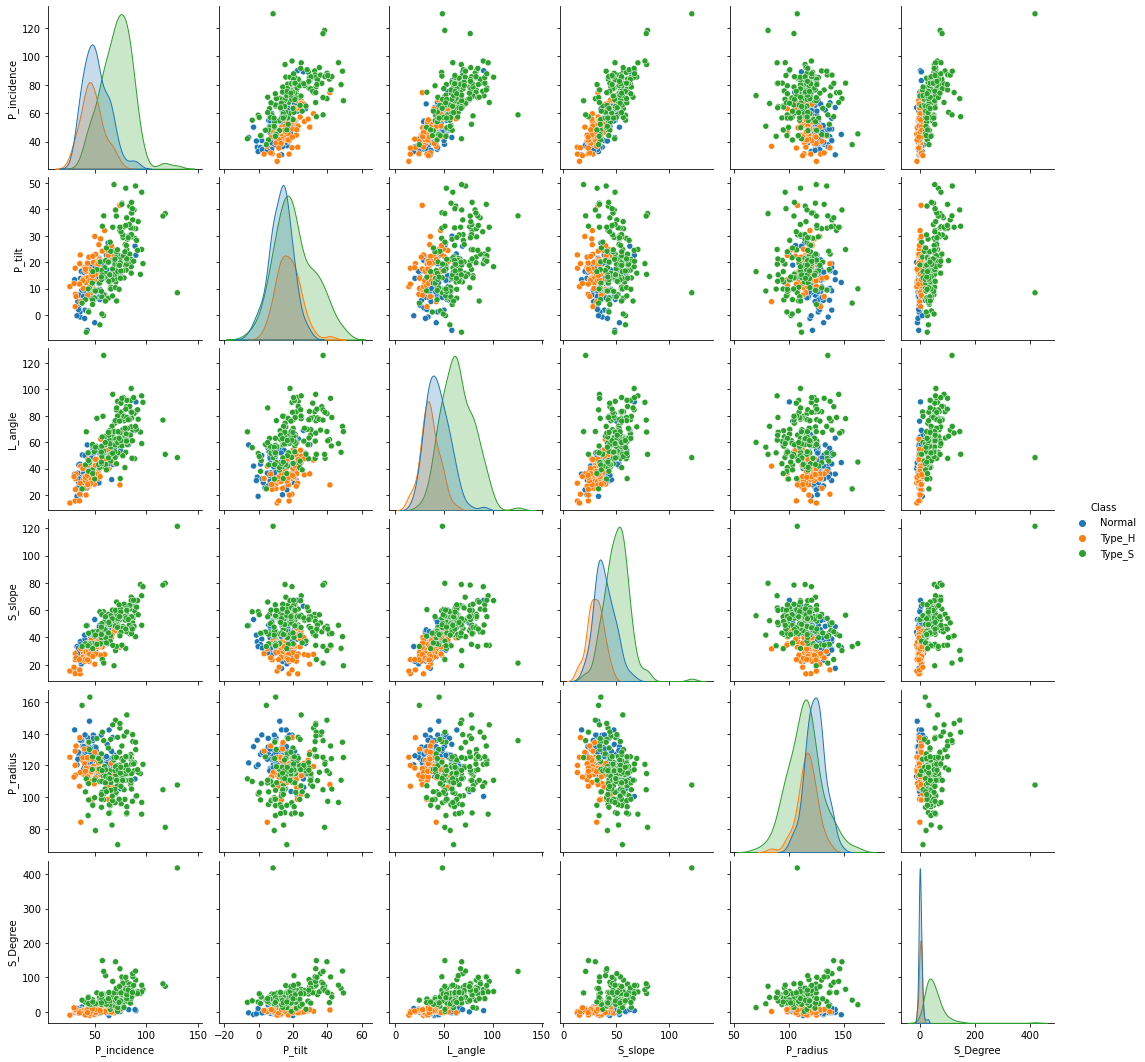

In [35]:
plt.figure(dpi=120)
sns.pairplot(p1data,hue='Class')
plt.show()

We knew P_incodence is postively correlated with P_tilt L_angle S-SLope.Higher values of these are leading to Type_S

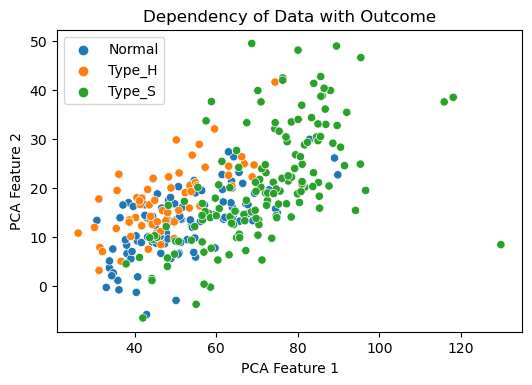

In [36]:
#Data Behaviour with target varaible using PCA
x= p1data.iloc[:,:-1].values
y= p1data.iloc[:,-1].values

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

x_new = pca.transform(x)

xs = x[:,0]
ys = x[:,1]

plt.figure(dpi=100)
sns.scatterplot(x=xs,y=ys,hue=y).set_title('Dependency of Data with Outcome')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

Data is not linearly seperable.Fititng liner model will not best accuracies

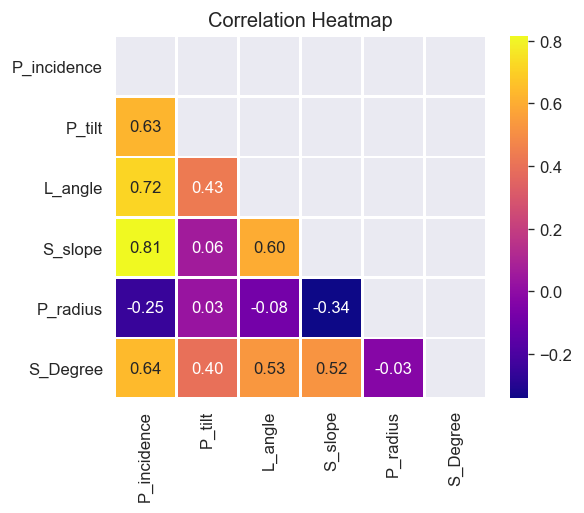

In [37]:
sns.set_style('darkgrid')
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(p1data.corr(),dtype = bool))
sns.heatmap(p1data.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [38]:
#From above we can understand that varaibles are isloating with each other

In [39]:
p1data.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# the independent variables set 
X = p1data[['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

       feature        VIF
0  P_incidence        inf
1       P_tilt        inf
2      L_angle  18.942993
3      S_slope        inf
4     P_radius  12.282573
5     S_Degree   2.361769


C:\Users\ascd0\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


#Segregate Predictors vs target varaibles

From dataset we have 6 predictor variables which used in determining target varaible 'CLASS'

Below are the Predictor variables
1. P_incidence
2. P_tilt
3. L_angle 
4. S_slope
5. P_radius 
6. S_degree

In [41]:
#as we have skewness in predictor varaiables better to go with scaling 

In [42]:
p1data["Class"].value_counts(normalize=True)

Type_S    0.483871
Normal    0.322581
Type_H    0.193548
Name: Class, dtype: float64

<AxesSubplot:>

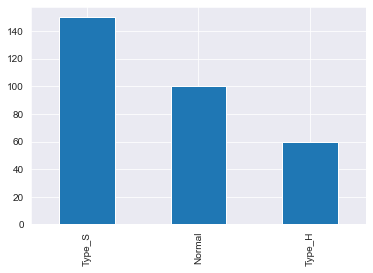

In [43]:
pd.value_counts(p1data["Class"]).plot(kind="bar")

Target varaible data is imbalanced but not to much.If any one class varaible is less than 5% then can balance the data using over-sampling or under-sampling techniques.

In [44]:
#Use label encoder to convert categorical variables to one-hot encoding (dummy variables)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
p1data['Class'] = le.fit_transform(p1data['Class'])
X=p1data.drop(['Class'],axis=1)
y=p1data['Class']

In [45]:
#standardization of data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
X_std = pd.DataFrame(StandardScaler().fit_transform(X))
X_std.columns = X.columns

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# the independent variables set 
X1 = X_std[['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X_std.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X1.values, i) 
                          for i in range(len(X1.columns))] 
  
print(vif_data)

       feature       VIF
0  P_incidence       inf
1       P_tilt       inf
2      L_angle  2.148642
3      S_slope       inf
4     P_radius  1.198679
5     S_Degree  1.774136


C:\Users\ascd0\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [47]:
#After scaling data VIF values have reduced to normal

In [48]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y,stratify=y)

In [49]:
print(X_train.shape)
print(y_train.shape)

(232, 6)
(232,)


In [50]:
print(X_test.shape)
print(y_test.shape)

(78, 6)
(78,)


In [51]:
#let us first observe the accuracies for different values of k.
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 


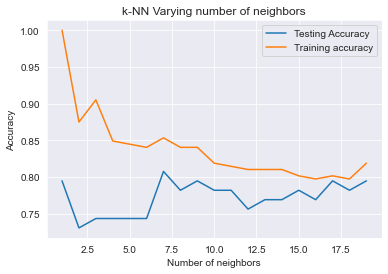

In [52]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [53]:
# #We can observe above that we get maximum testing accuracy for k=7. So lets create a KNeighborsClassifier with number of neighbors as 7.
# #instantiate learning model (k = 3)

# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print("Accuracy score for K=7 is ",accuracy_score(y_test, y_pred))

Accuracy score for K=7 is  0.8076923076923077


In [54]:
#confusion metrics

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[20,  2,  3],
       [ 4, 10,  1],
       [ 4,  1, 33]], dtype=int64)

In [55]:
#Classification report
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        25
           1       0.77      0.67      0.71        15
           2       0.89      0.87      0.88        38

    accuracy                           0.81        78
   macro avg       0.79      0.78      0.78        78
weighted avg       0.81      0.81      0.81        78



Precision – What percent of your predictions were correct
Recall – What percent of the positive cases did you catch
F1 score – What percent of positive predictions were correct
support is the number of occurence of the given class in your dataset

For Normal, We have 65% predictions(Precision) correct and able to caught 80%(Recall) positive cases correctly and 71%(F1 Score) of postive predictions are correct

For Type_H, We have 78% predictions(Precision) correct and able to caught 47%(Recall) positive cases correctly and 58%(F1 Score) of postive predictions are correct

For Normal, We have 92% predictions(Precision) correct and able to caught 92%(Recall) positive cases correctly and 92%(F1 Score) of postive predictions are correct

Support numbers- For every 78 occurences we have 25 Normal occurances
                                                 15 Type_H occurances
                                                 38 Type_S occurences
            
Overall accuracy is 79%

In [56]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [57]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 7


Means 7 neigboures participated in the voting to determine classification.

In [58]:
#Hyperparameter tuning using gridsearch
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [59]:
print("Best score is ",knn_cv.best_score_)
print("Best neighbour is ",knn_cv.best_params_)

Best score is  0.8548387096774194
Best neighbour is  {'n_neighbors': 21}


 with hyperparameter tuning increased accuracy from 82% to 86%
 
 knn classifier with number of neighbors as 21 achieves the best score/accuracy of 0.8548 i.e about 86%

Conclusion and improvisation
--------------------------------------------

Trained model showed good accuracy with hyperparameter tuning. Accuracy has been from 82% to 86%

Data is highly correlated with each other and has outliers.As we have used KNN clasfication oultiers are not a big problem.

Class varaible not interpreted correctly for all classes.This can be improvised to take correct labels for target class



# PART2

In [60]:
p2data_1=pd.read_csv(r'C:\Users\ascd0\OneDrive\Desktop\AIML\Part2 - Data1.csv')
p2data_2=pd.read_csv(r'C:\Users\ascd0\OneDrive\Desktop\AIML\Part2 -Data2.csv')

In [61]:
p2data_1.shape

(5000, 8)

In [62]:
p2data_1.head(5)

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

In [63]:
p2data_2.shape

(5000, 7)

In [64]:
p2data_2.head(5)

ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [65]:
#p2data=pd.concat(p2data_1,p2data_2,axis=1)
p2data = pd.merge(left=p2data_1, right=p2data_2, left_on='ID', right_on='ID')

In [66]:
p2data.shape

(5000, 14)

In [67]:
p2data.head(5)

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN

In [68]:
p2data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [69]:
p2data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


Dataset have 13 variables of different datatypes of int and float and have 5000 records. Some variables datatypes seems irrevelant

Loan on card column have 4980 records only. seems have null values.

In [70]:
p2data['LoanOnCard'] =p2data['LoanOnCard'].fillna(0)

In [71]:
p2data.describe().T

count          mean          std     min       25%  \
ID                   5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                  5000.0     45.338400    11.463166    23.0     35.00   
CustomerSince        5000.0     20.104600    11.467954    -3.0     10.00   
HighestSpend         5000.0     73.774200    46.033729     8.0     39.00   
ZipCode              5000.0  93152.503000  2121.852197  9307.0  91911.00   
HiddenScore          5000.0      2.396400     1.147663     1.0      1.00   
MonthlyAverageSpend  5000.0      1.937938     1.747659     0.0      0.70   
Level                5000.0      1.881000     0.839869     1.0      1.00   
Mortgage             5000.0     56.498800   101.713802     0.0      0.00   
Security             5000.0      0.104400     0.305809     0.0      0.00   
FixedDepositAccount  5000.0      0.060400     0.238250     0.0      0.00   
InternetBanking      5000.0      0.596800     0.490589     0.0      0.00   
CreditCard           5000.0      0.294000     0.455637     0.0      0.00   
LoanOnCard           5000.0      0.096000     0.294621     0.0      0.00   

                         50%       75%      max  
ID                    2500.5   3750.25   5000.0  
Age                     45.0     55.00     67.0  
CustomerSince           20.0     30.00     43.0  
HighestSpend            64.0     98.00    224.0  
ZipCode              93437.0  94608.00  96651.0  
HiddenScore              2.0      3.00      4.0  
MonthlyAverageSpend      1.5      2.50     10.0  
Level                    2.0      3.00      3.0  
Mortgage                 0.0    101.00    635.0  
Security                 0.0      0.00      1.0  
FixedDepositAccount      0.0      0.00      1.0  
InternetBanking          1.0      1.00      1.0  
CreditCard               0.0      1.00      1.0  
LoanOnCard               0.0      0.00      1.0

In [72]:
p2data['LoanOnCard'].unique()

array([0., 1.])

In [73]:
p2data['LoanOnCard'].value_counts()

0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64

ID column is of no use. Good to drop it.
ZipCode may not be useful in predicting judgements.Good to drop it....need to handle

LoanonCard is having some blank values

InternetBanking, CreditCard and LoanOnCard represents customer uses it or not. SO, all these have to be categorical type and have to be converted



In [74]:
#Drop ID and ZIPCODE columns which are of no use in predicting
p2data.drop(['ID','ZipCode'],axis=1,inplace=True)

In [75]:
p2data.nunique()

#Even though we have 5000 observations below are the unique values of each column

Age                     45
CustomerSince           47
HighestSpend           162
HiddenScore              4
MonthlyAverageSpend    108
Level                    3
Mortgage               347
Security                 2
FixedDepositAccount      2
InternetBanking          2
CreditCard               2
LoanOnCard               2
dtype: int64

In [76]:
p2data['InternetBanking'].value_counts()

1    2984
0    2016
Name: InternetBanking, dtype: int64

In [77]:
p2data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [78]:
#convert to categorical varaibles
p2data[['InternetBanking', 'CreditCard', 'LoanOnCard']]=p2data[['InternetBanking', 'CreditCard', 'LoanOnCard']].astype('object')

In [79]:
p2data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   HiddenScore          5000 non-null   int64  
 4   MonthlyAverageSpend  5000 non-null   float64
 5   Level                5000 non-null   int64  
 6   Mortgage             5000 non-null   int64  
 7   Security             5000 non-null   int64  
 8   FixedDepositAccount  5000 non-null   int64  
 9   InternetBanking      5000 non-null   object 
 10  CreditCard           5000 non-null   object 
 11  LoanOnCard           5000 non-null   object 
dtypes: float64(1), int64(8), object(3)
memory usage: 507.8+ KB


In [80]:
p2data.describe(include='all').T

count  unique  top    freq       mean         std   min  \
Age                  5000.0     NaN  NaN     NaN  45.338400   11.463166  23.0   
CustomerSince        5000.0     NaN  NaN     NaN  20.104600   11.467954  -3.0   
HighestSpend         5000.0     NaN  NaN     NaN  73.774200   46.033729   8.0   
HiddenScore          5000.0     NaN  NaN     NaN   2.396400    1.147663   1.0   
MonthlyAverageSpend  5000.0     NaN  NaN     NaN   1.937938    1.747659   0.0   
Level                5000.0     NaN  NaN     NaN   1.881000    0.839869   1.0   
Mortgage             5000.0     NaN  NaN     NaN  56.498800  101.713802   0.0   
Security             5000.0     NaN  NaN     NaN   0.104400    0.305809   0.0   
FixedDepositAccount  5000.0     NaN  NaN     NaN   0.060400    0.238250   0.0   
InternetBanking      5000.0     2.0  1.0  2984.0        NaN         NaN   NaN   
CreditCard           5000.0     2.0  0.0  3530.0        NaN         NaN   NaN   
LoanOnCard           5000.0     2.0  0.0  4520.0        NaN         NaN   NaN   

                      25%   50%    75%    max  
Age                  35.0  45.0   55.0   67.0  
CustomerSince        10.0  20.0   30.0   43.0  
HighestSpend         39.0  64.0   98.0  224.0  
HiddenScore           1.0   2.0    3.0    4.0  
MonthlyAverageSpend   0.7   1.5    2.5   10.0  
Level                 1.0   2.0    3.0    3.0  
Mortgage              0.0   0.0  101.0  635.0  
Security              0.0   0.0    0.0    1.0  
FixedDepositAccount   0.0   0.0    0.0    1.0  
InternetBanking       NaN   NaN    NaN    NaN  
CreditCard            NaN   NaN    NaN    NaN  
LoanOnCard            NaN   NaN    NaN    NaN

At quick look we can observe customersince(might be Years) is having negative whcih might be incorrect.
HighestSpend and MonthlyAverageSpend - data seems to exist most on left side

In [81]:
#find the negative values in CustomerSince column
p2data[p2data['CustomerSince'] < 0]['CustomerSince'].count()

52

In [82]:
#lets replace all these negative values with the median of Cusotmersince
p2data['CustomerSince']=p2data['CustomerSince'].apply(lambda x : x if x>0 else p2data['CustomerSince'].median())

In [83]:
p2data[p2data['CustomerSince'] < 0]['CustomerSince'].count()

0

In [84]:
p2data.mean()

Age                    45.338400
CustomerSince          20.591600
HighestSpend           73.774200
HiddenScore             2.396400
MonthlyAverageSpend     1.937938
Level                   1.881000
Mortgage               56.498800
Security                0.104400
FixedDepositAccount     0.060400
InternetBanking         0.596800
CreditCard              0.294000
LoanOnCard              0.096000
dtype: float64

In [85]:
p2data.median()

Age                    45.0
CustomerSince          20.0
HighestSpend           64.0
HiddenScore             2.0
MonthlyAverageSpend     1.5
Level                   2.0
Mortgage                0.0
Security                0.0
FixedDepositAccount     0.0
InternetBanking         1.0
CreditCard              0.0
LoanOnCard              0.0
dtype: float64

if the mean is Greater than mode or median then data is positively skewed. if the mean is lower then mode or meadian then data is negatively skewed

As most mean values are greater than median it seems data is positively skewed.Let confirm on this below

<AxesSubplot:>

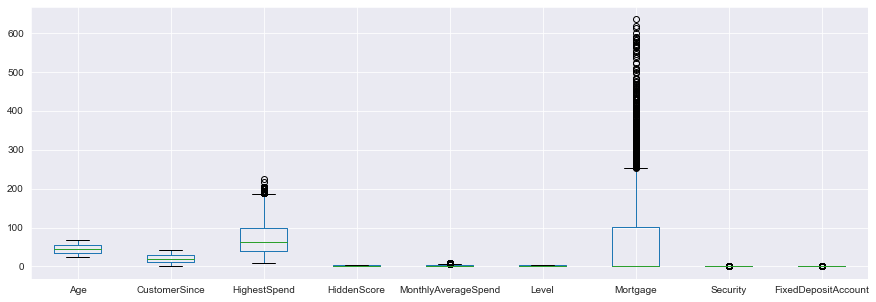

In [86]:
p2data.boxplot(figsize=(15,5))

<AxesSubplot:xlabel='Mortgage'>

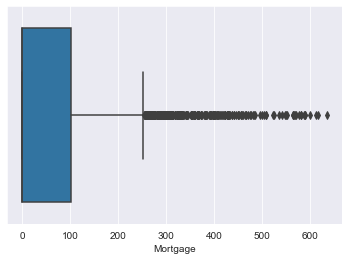

In [87]:
sns.boxplot(x=p2data.Mortgage)

Can see lot of outliers for HighestSpend, MonthlyAverageSpend,Mortgage,Level,Security and FD Account. Data is right skwed - data existed most on left side

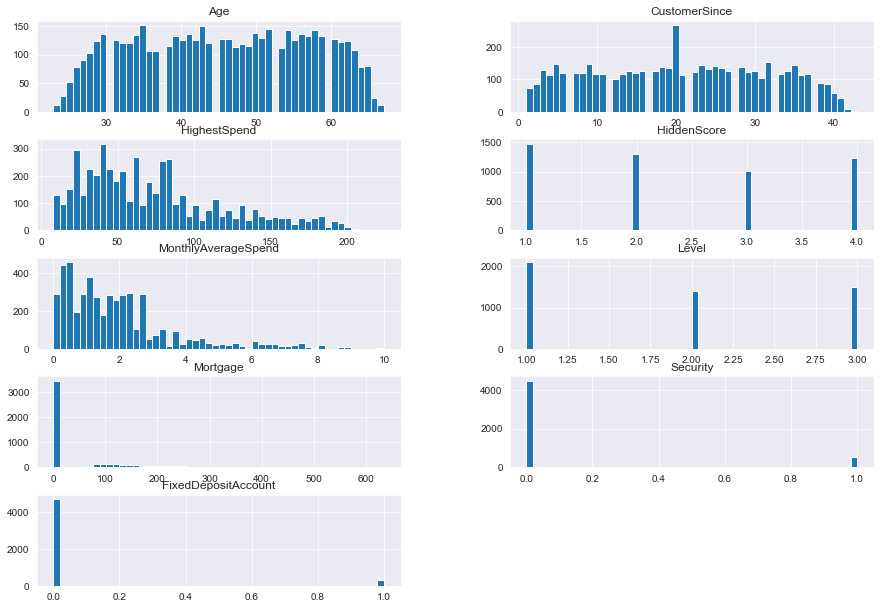

In [88]:
cols=list(p2data)
p2data[cols].hist(stacked=False,bins=50,figsize=(15,30),layout=(14,2));

Age - we have customers ranging from 30 to 60
customer since - Handled negative data above.data ranigng from 0 to 40.
Highest Spend - Ranges upto 200 but most data existed in range of 30 to 90
hidden score - Has only 4 unique values
MOnthlyAverageSpend - Ranges from 0 to 10. Average spending of 0 seems incorrect. Most data lies in range of 0 to 3.
Level - Has 3 unique values
Mortgage - People who dont have any mortagage are higher.Few people have mortage and major data existed in range of 80 to 150
Security - People who dont have any Security acct are higher.very Few people have accounts
FixedDeposit Accounts - People who dont have any FD acct are higher.very Few people have accounts

In [89]:
p2data.columns

Index(['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

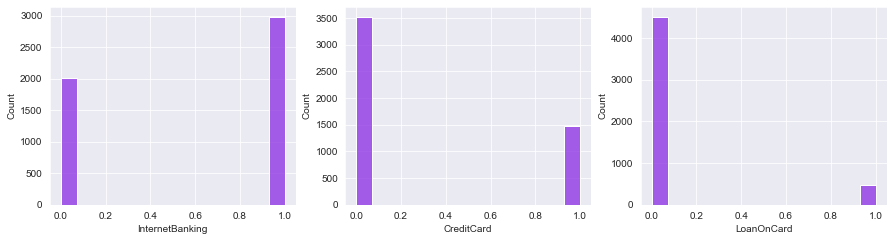

In [90]:
count=1
plt.subplots(figsize=(15, 8))
for i, col in enumerate(p2data.select_dtypes([np.object])):
    plt.subplot(2,3,count)
    sns.histplot(data=p2data[col],color="blueviolet")
    count+=1

plt.show()


Internet Banking - People who uses internetbanking are higher than the one's dont have internet banking.
Creditcard - People who dont have creditcard are higher 
LoanonCard - VEry few people took loanoncard

From categorical data assuming 0 as people who dont have account and 1 as people who have account

In [91]:
p2data.skew()

Age                   -0.029341
CustomerSince         -0.003845
HighestSpend           0.841339
HiddenScore            0.155221
MonthlyAverageSpend    1.598443
Level                  0.227093
Mortgage               2.104002
Security               2.588268
FixedDepositAccount    3.691714
InternetBanking       -0.394785
CreditCard             0.904589
LoanOnCard             2.743607
dtype: float64

Ideal value fo skewness should between -1 and +1....Few columns have more than value 1 and confirms lot of outliers in data

# Handling Outliers

In [92]:
p2data["MonthlyAverageSpend"] = p2data["MonthlyAverageSpend"].map(lambda i: np.log(i) if i > 0 else 0) 
print('Skewness value After Transformation', p2data['MonthlyAverageSpend'].skew())

Skewness value After Transformation -0.5996023947004566


In [93]:
p2data["HighestSpend"] = p2data["HighestSpend"].map(lambda i: np.log(i) if i > 0 else 0) 
print('Skewness value After Transformation', p2data['HighestSpend'].skew())

Skewness value After Transformation -0.46050403395988815


In [94]:
p2data["Mortgage"] = p2data["Mortgage"].map(lambda i: np.log(i) if i > 0 else 0) 
print('Skewness value after Transformation', p2data['Mortgage'].skew())

Skewness value after Transformation 0.8772982703535349


In [95]:
p2data.skew()

Age                   -0.029341
CustomerSince         -0.003845
HighestSpend          -0.460504
HiddenScore            0.155221
MonthlyAverageSpend   -0.599602
Level                  0.227093
Mortgage               0.877298
Security               2.588268
FixedDepositAccount    3.691714
InternetBanking       -0.394785
CreditCard             0.904589
LoanOnCard             2.743607
dtype: float64

<AxesSubplot:>

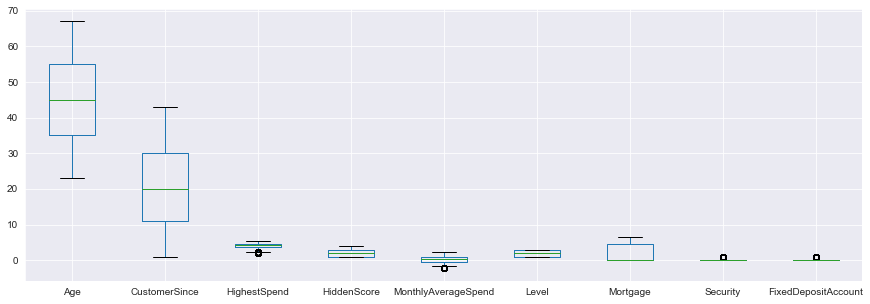

In [96]:
p2data.boxplot(figsize=(15,5))

<Figure size 720x480 with 0 Axes>

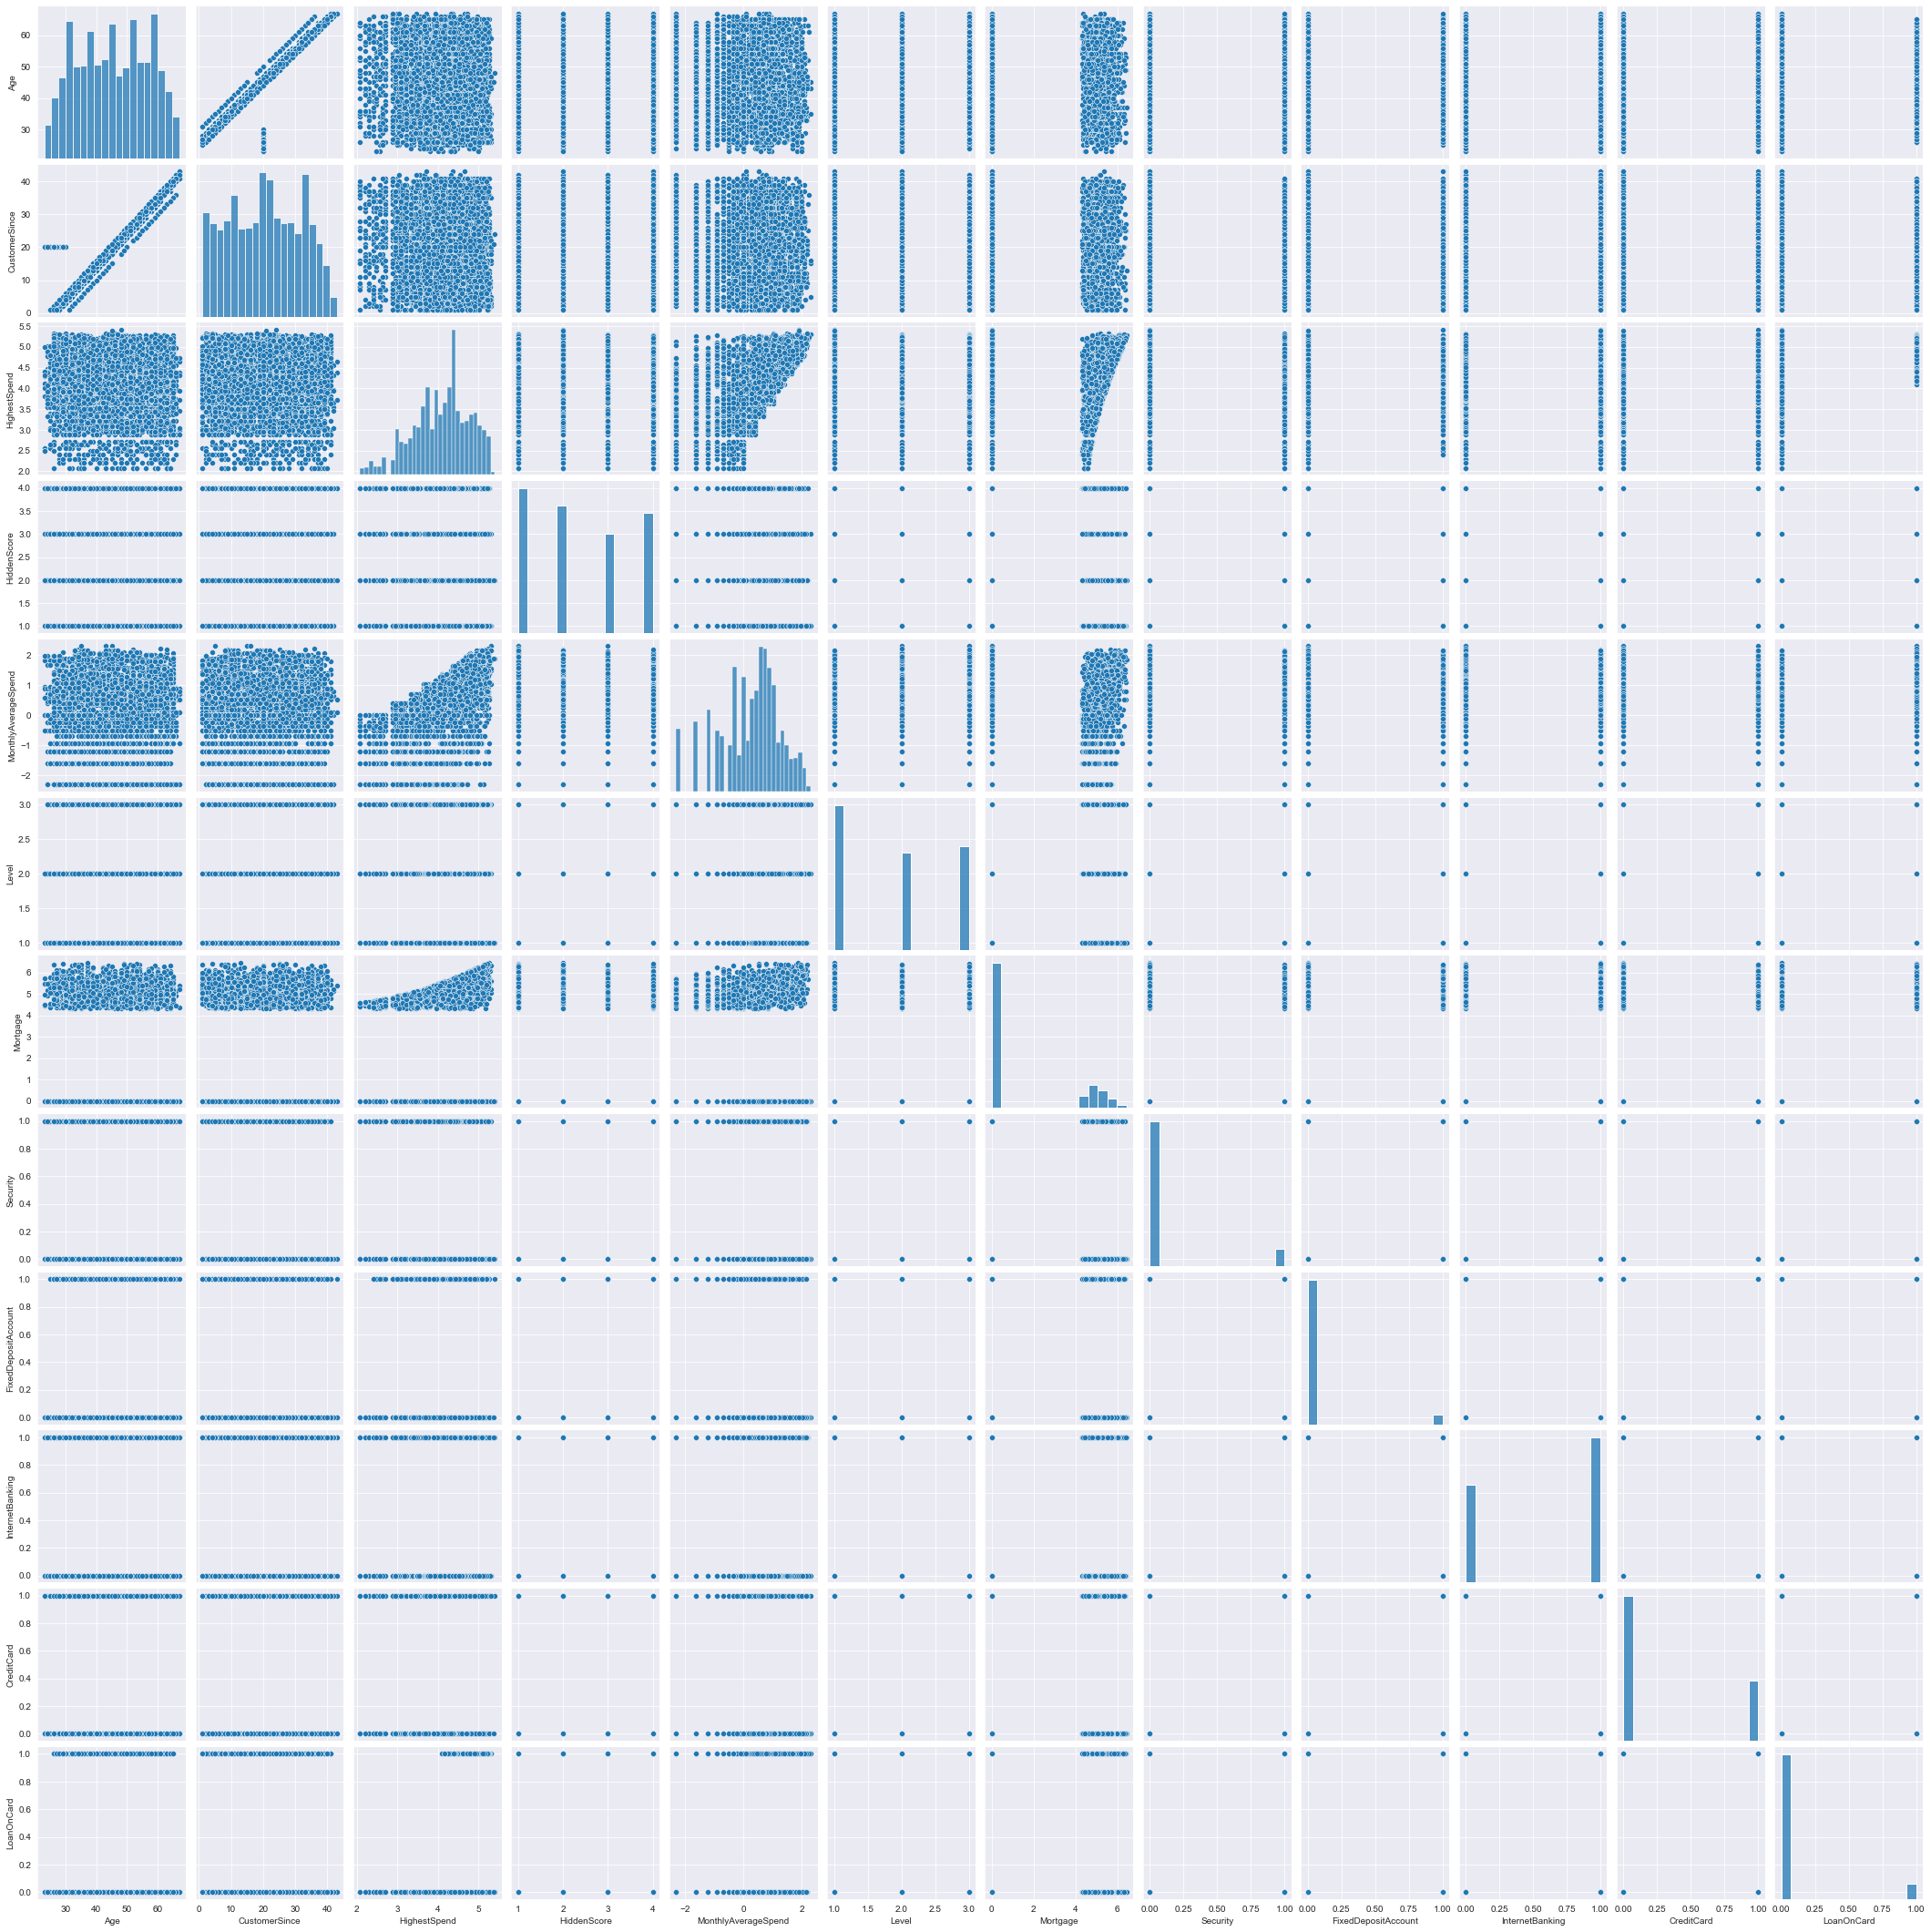

In [97]:
plt.figure(dpi=120)
sns.pairplot(p2data)
plt.show()

Age and cusotmersince are having higher correlation. Most of the data is right skewed

HighestSpend and Mortgage have linear association.People who spent high are having high mortgage values.

In [98]:
p2data.columns

Index(['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

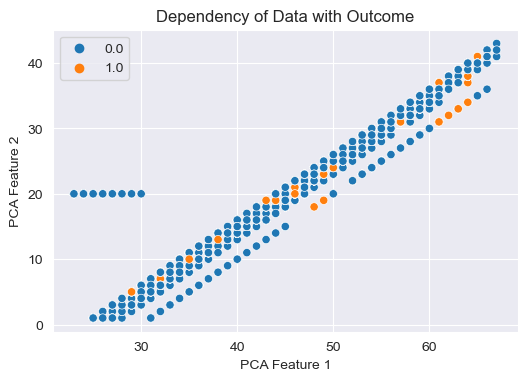

In [99]:
#Data Behaviour with target varaible using PCA
x= p2data.iloc[:,:-1].values
y= p2data.iloc[:,-1].values

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

x_new = pca.transform(x)

xs = x[:,0]
ys = x[:,1]

plt.figure(dpi=100)
sns.scatterplot(x=xs,y=ys,hue=y).set_title('Dependency of Data with Outcome')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

Output class varaible data is in strong linear relationship with data

C:\Users\ascd0\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


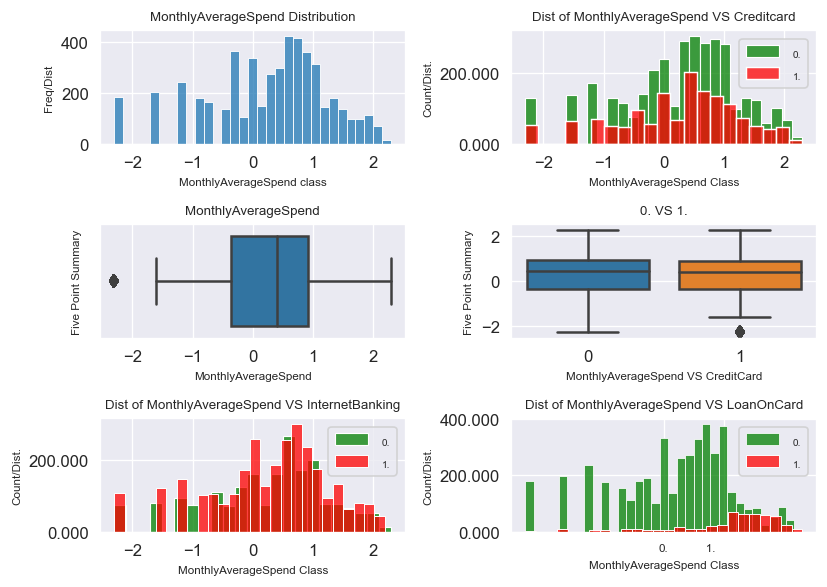

In [100]:
fig,axes = plt.subplots(nrows=3,ncols=2,dpi=120,figsize = (7,5))

plot10 = sns.histplot(p2data['MonthlyAverageSpend'],ax=axes[0][0])
axes[0][0].set_title('MonthlyAverageSpend Distribution',fontdict={'fontsize':8})
axes[0][0].set_xlabel('MonthlyAverageSpend class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.histplot(p2data[p2data['CreditCard']==0]['MonthlyAverageSpend'],ax=axes[0][1],color='green',label='0.')
sns.histplot(p2data[p2data['CreditCard']==1]['MonthlyAverageSpend'],ax=axes[0][1],color='red',label='1.')
axes[0][1].set_title('Dist of MonthlyAverageSpend VS Creditcard',fontdict={'fontsize':8})
axes[0][1].set_xlabel('MonthlyAverageSpend Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot20 = sns.boxplot(x=p2data['MonthlyAverageSpend'],ax=axes[1][0],orient='v')
axes[1][0].set_title('MonthlyAverageSpend',fontdict={'fontsize':8})
axes[1][0].set_xlabel('MonthlyAverageSpend',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

plot21 = sns.boxplot(x='CreditCard',y='MonthlyAverageSpend',data=p2data,ax=axes[1][1])
axes[1][1].set_title('0. VS 1.',fontdict={'fontsize':8})
axes[1][1].set_xlabel('MonthlyAverageSpend VS CreditCard',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['0.','               1.                       '],fontsize=7)
plt.tight_layout()

plot30=sns.histplot(p2data[p2data['InternetBanking']==0]['MonthlyAverageSpend'],ax=axes[2][0],color='green',label='0.')
sns.histplot(p2data[p2data['InternetBanking']==1]['MonthlyAverageSpend'],ax=axes[2][0],color='red',label='1.')
axes[2][0].set_title('Dist of MonthlyAverageSpend VS InternetBanking',fontdict={'fontsize':8})
axes[2][0].set_xlabel('MonthlyAverageSpend Class',fontdict={'fontsize':7})
axes[2][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[2][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot30.axes.legend(loc=1)
plt.setp(axes[2][0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[2][0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot31=sns.histplot(p2data[p2data['LoanOnCard']==0]['MonthlyAverageSpend'],ax=axes[2][1],color='green',label='0.')
sns.histplot(p2data[p2data['LoanOnCard']==1]['MonthlyAverageSpend'],ax=axes[2][1],color='red',label='1.')
axes[2][1].set_title('Dist of MonthlyAverageSpend VS LoanOnCard',fontdict={'fontsize':8})
axes[2][1].set_xlabel('MonthlyAverageSpend Class',fontdict={'fontsize':7})
axes[2][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[2][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot31.axes.legend(loc=1)
plt.setp(axes[2][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[2][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()
plt.show()

Monthly Average spend data is rightskewed.Have lot of outliers above upper whisker.

People who have internetbanking are spending higher than people who dont have internetbanking
People who dont have creditcard and loanoncard are spending  higher than people who own card

Creditcard doesnt have much impact on monthly spending.

C:\Users\ascd0\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


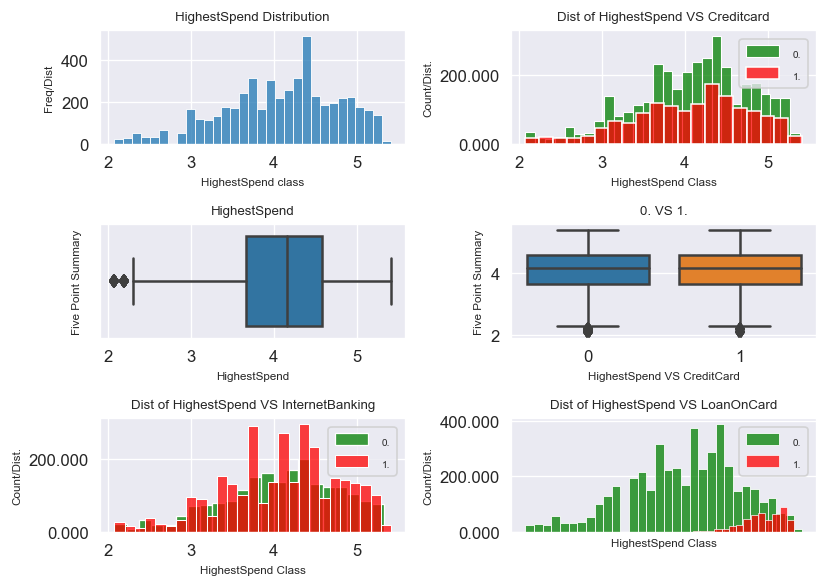

In [101]:
fig,axes = plt.subplots(nrows=3,ncols=2,dpi=120,figsize = (7,5))

plot10 = sns.histplot(p2data['HighestSpend'],ax=axes[0][0])
axes[0][0].set_title('HighestSpend Distribution',fontdict={'fontsize':8})
axes[0][0].set_xlabel('HighestSpend class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.histplot(p2data[p2data['CreditCard']==0]['HighestSpend'],ax=axes[0][1],color='green',label='0.')
sns.histplot(p2data[p2data['CreditCard']==1]['HighestSpend'],ax=axes[0][1],color='red',label='1.')
axes[0][1].set_title('Dist of HighestSpend VS Creditcard',fontdict={'fontsize':8})
axes[0][1].set_xlabel('HighestSpend Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot20 = sns.boxplot(x=p2data['HighestSpend'],ax=axes[1][0],orient='v')
axes[1][0].set_title('HighestSpend',fontdict={'fontsize':8})
axes[1][0].set_xlabel('HighestSpend',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

plot21 = sns.boxplot(x='CreditCard',y='HighestSpend',data=p2data,ax=axes[1][1])
axes[1][1].set_title('0. VS 1.',fontdict={'fontsize':8})
axes[1][1].set_xlabel('HighestSpend VS CreditCard',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['0.','               1.'],fontsize=7)
plt.tight_layout()

plot30=sns.histplot(p2data[p2data['InternetBanking']==0]['HighestSpend'],ax=axes[2][0],color='green',label='0.')
sns.histplot(p2data[p2data['InternetBanking']==1]['HighestSpend'],ax=axes[2][0],color='red',label='1.')
axes[2][0].set_title('Dist of HighestSpend VS InternetBanking',fontdict={'fontsize':8})
axes[2][0].set_xlabel('HighestSpend Class',fontdict={'fontsize':7})
axes[2][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[2][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot30.axes.legend(loc=1)
plt.setp(axes[2][0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[2][0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot31=sns.histplot(p2data[p2data['LoanOnCard']==0]['HighestSpend'],ax=axes[2][1],color='green',label='0.')
sns.histplot(p2data[p2data['LoanOnCard']==1]['HighestSpend'],ax=axes[2][1],color='red',label='1.')
axes[2][1].set_title('Dist of HighestSpend VS LoanOnCard',fontdict={'fontsize':8})
axes[2][1].set_xlabel('HighestSpend Class',fontdict={'fontsize':7})
axes[2][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[2][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot31.axes.legend(loc=1)
plt.setp(axes[2][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[2][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()
plt.show()

Highest spend data is rightskewed.Have lot of outliers above upper whisker.

People who have internetbanking are spending higher than people who dont have internetbanking
People who dont have creditcard and loanoncard are spending  higher than people who own card

Creditcard doesnt have much impact on monthly spending.

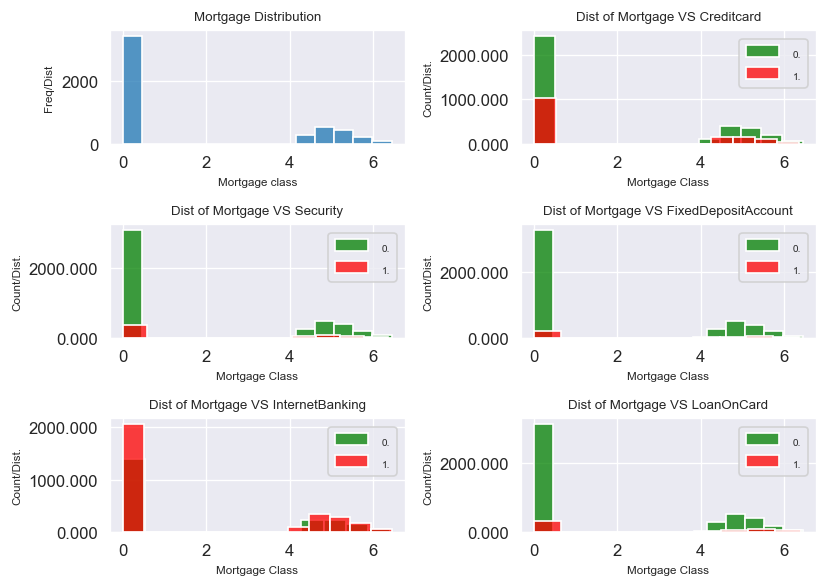

In [102]:
fig,axes = plt.subplots(nrows=3,ncols=2,dpi=120,figsize = (7,5))

plot10 = sns.histplot(p2data['Mortgage'],ax=axes[0][0])
axes[0][0].set_title('Mortgage Distribution',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Mortgage class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.histplot(p2data[p2data['CreditCard']==0]['Mortgage'],ax=axes[0][1],color='green',label='0.')
sns.histplot(p2data[p2data['CreditCard']==1]['Mortgage'],ax=axes[0][1],color='red',label='1.')
axes[0][1].set_title('Dist of Mortgage VS Creditcard',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Mortgage Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10=sns.histplot(p2data[p2data['Security']==0]['Mortgage'],ax=axes[1][0],color='green',label='0.')
sns.histplot(p2data[p2data['Security']==1]['Mortgage'],ax=axes[1][0],color='red',label='1.')
axes[1][0].set_title('Dist of Mortgage VS Security',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Mortgage Class',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[1][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot10.axes.legend(loc=1)
plt.setp(axes[1][0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[1][0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot11=sns.histplot(p2data[p2data['FixedDepositAccount']==0]['Mortgage'],ax=axes[1][1],color='green',label='0.')
sns.histplot(p2data[p2data['FixedDepositAccount']==1]['Mortgage'],ax=axes[1][1],color='red',label='1.')
axes[1][1].set_title('Dist of Mortgage VS FixedDepositAccount',fontdict={'fontsize':8})
axes[1][1].set_xlabel('Mortgage Class',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[1][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot11.axes.legend(loc=1)
plt.setp(axes[1][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[1][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot30=sns.histplot(p2data[p2data['InternetBanking']==0]['Mortgage'],ax=axes[2][0],color='green',label='0.')
sns.histplot(p2data[p2data['InternetBanking']==1]['Mortgage'],ax=axes[2][0],color='red',label='1.')
axes[2][0].set_title('Dist of Mortgage VS InternetBanking',fontdict={'fontsize':8})
axes[2][0].set_xlabel('Mortgage Class',fontdict={'fontsize':7})
axes[2][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[2][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot30.axes.legend(loc=1)
plt.setp(axes[2][0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[2][0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot31=sns.histplot(p2data[p2data['LoanOnCard']==0]['Mortgage'],ax=axes[2][1],color='green',label='0.')
sns.histplot(p2data[p2data['LoanOnCard']==1]['Mortgage'],ax=axes[2][1],color='red',label='1.')
axes[2][1].set_title('Dist of Mortgage VS LoanOnCard',fontdict={'fontsize':8})
axes[2][1].set_xlabel('Mortgage Class',fontdict={'fontsize':7})
axes[2][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[2][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot31.axes.legend(loc=1)
plt.setp(axes[2][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[2][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()
plt.show()

Mortgage data is rightskewed.Majority people dont have mortgages.

People who have internetbanking are high Mortgages than people who dont have internetbanking
People who dont have security Accts,FD Accounts,creditcard and loanoncard are having less mortgages than people who own

In [103]:
p2data.columns

Index(['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

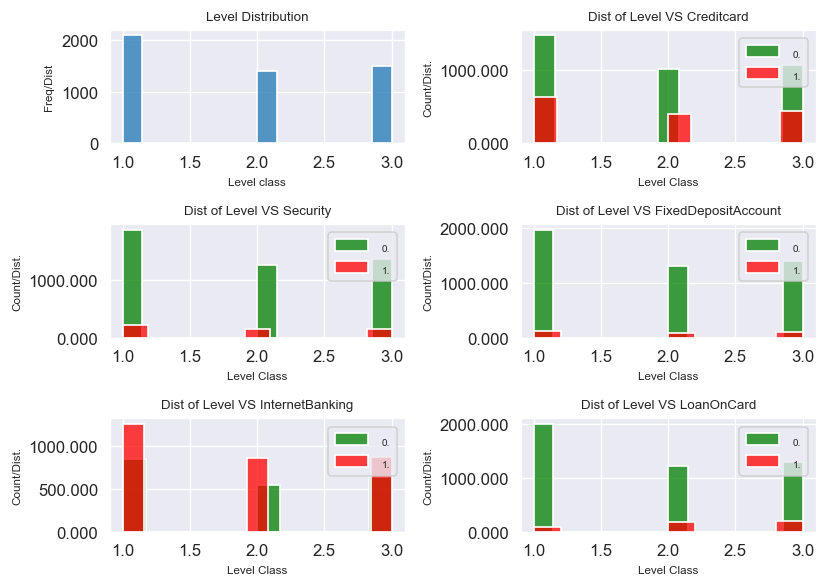

In [104]:
fig,axes = plt.subplots(nrows=3,ncols=2,dpi=120,figsize = (7,5))

plot10 = sns.histplot(p2data['Level'],ax=axes[0][0])
axes[0][0].set_title('Level Distribution',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Level class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.histplot(p2data[p2data['CreditCard']==0]['Level'],ax=axes[0][1],color='green',label='0.')
sns.histplot(p2data[p2data['CreditCard']==1]['Level'],ax=axes[0][1],color='red',label='1.')
axes[0][1].set_title('Dist of Level VS Creditcard',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Level Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10=sns.histplot(p2data[p2data['Security']==0]['Level'],ax=axes[1][0],color='green',label='0.')
sns.histplot(p2data[p2data['Security']==1]['Level'],ax=axes[1][0],color='red',label='1.')
axes[1][0].set_title('Dist of Level VS Security',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Level Class',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[1][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot10.axes.legend(loc=1)
plt.setp(axes[1][0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[1][0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot11=sns.histplot(p2data[p2data['FixedDepositAccount']==0]['Level'],ax=axes[1][1],color='green',label='0.')
sns.histplot(p2data[p2data['FixedDepositAccount']==1]['Level'],ax=axes[1][1],color='red',label='1.')
axes[1][1].set_title('Dist of Level VS FixedDepositAccount',fontdict={'fontsize':8})
axes[1][1].set_xlabel('Level Class',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[1][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot11.axes.legend(loc=1)
plt.setp(axes[1][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[1][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot30=sns.histplot(p2data[p2data['InternetBanking']==0]['Level'],ax=axes[2][0],color='green',label='0.')
sns.histplot(p2data[p2data['InternetBanking']==1]['Level'],ax=axes[2][0],color='red',label='1.')
axes[2][0].set_title('Dist of Level VS InternetBanking',fontdict={'fontsize':8})
axes[2][0].set_xlabel('Level Class',fontdict={'fontsize':7})
axes[2][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[2][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot30.axes.legend(loc=1)
plt.setp(axes[2][0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[2][0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot31=sns.histplot(p2data[p2data['LoanOnCard']==0]['Level'],ax=axes[2][1],color='green',label='0.')
sns.histplot(p2data[p2data['LoanOnCard']==1]['Level'],ax=axes[2][1],color='red',label='1.')
axes[2][1].set_title('Dist of Level VS LoanOnCard',fontdict={'fontsize':8})
axes[2][1].set_xlabel('Level Class',fontdict={'fontsize':7})
axes[2][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[2][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot31.axes.legend(loc=1)
plt.setp(axes[2][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[2][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()
plt.show()

Level Variable has 3 unique values 1,2 and 3

People who have internetbanking are are higher in all levels

People who have creditcard,Security accounts,FD accounts,Loanoncard are having less levels compared to who dont have

*== Joint plot of CustomerSince with Other Variables ==* 

Correlation between CustomerSince and Age ==>  0.9579787429805204


<Figure size 500x400 with 0 Axes>

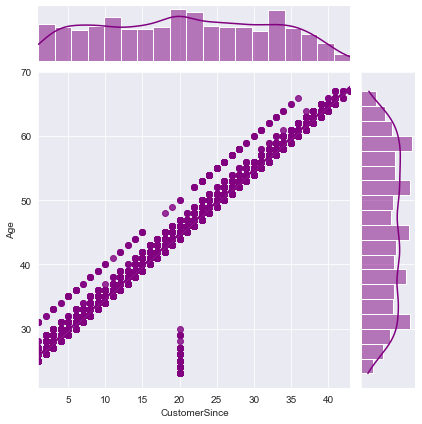

Correlation between CustomerSince and HighestSpend ==>  -0.055870413126274554


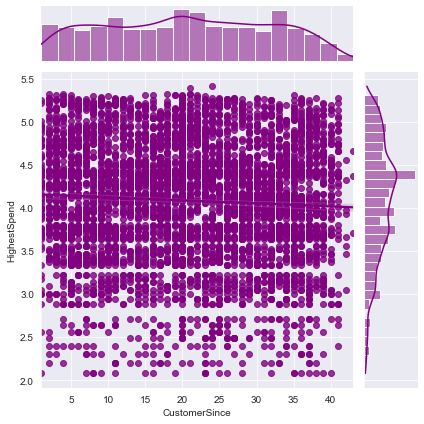

Correlation between CustomerSince and HiddenScore ==>  -0.03836990745317608


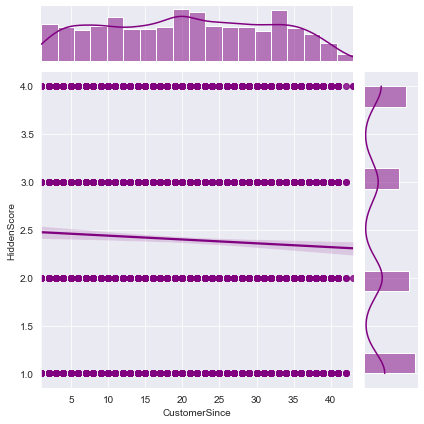

Correlation between CustomerSince and MonthlyAverageSpend ==>  -0.0479244361447085


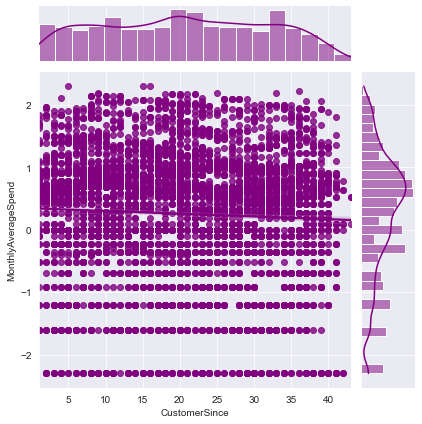

Correlation between CustomerSince and Level ==>  0.027075631493873757


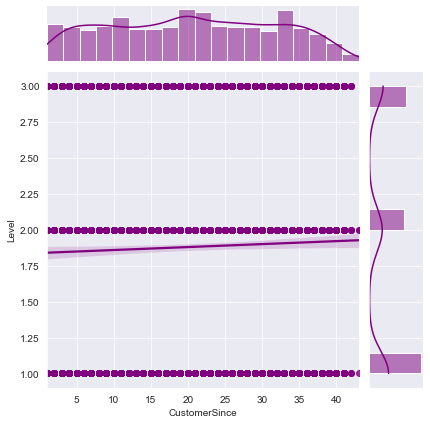

Correlation between CustomerSince and Mortgage ==>  -0.016862606993554775


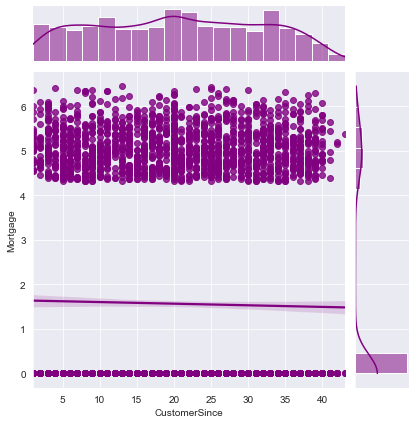

Correlation between CustomerSince and Security ==>  0.0008431496733300888


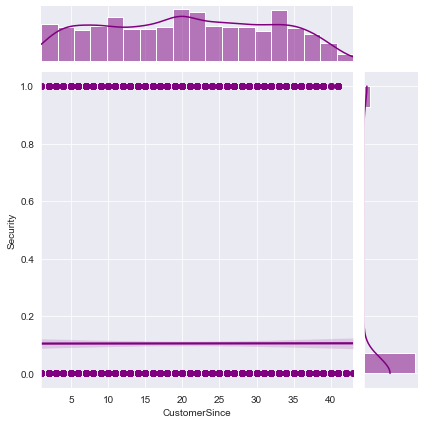

Correlation between CustomerSince and FixedDepositAccount ==>  0.0026197424449728546


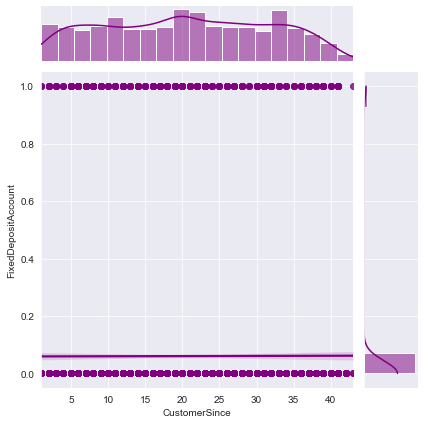

In [105]:
cols=['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount']
plt.figure(dpi = 100, figsize = (5,4))
print("*== Joint plot of CustomerSince with Other Variables ==* \n")
for i in cols:
    if i != 'CustomerSince':
        print(f"Correlation between CustomerSince and {i} ==> ",p2data.corr().loc['CustomerSince'][i])
        sns.jointplot(x='CustomerSince',y=i,data=p2data,kind = 'reg',color = 'purple')
        plt.show()

CustomerSince is having negative correlation with all varaibles except age and Level

*== Joint plot of Age with Other Variables ==* 

Correlation between Age and CustomerSince ==>  0.9579787429805204


<Figure size 500x400 with 0 Axes>

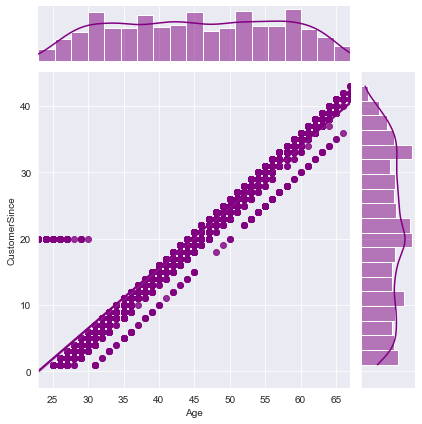

Correlation between Age and HighestSpend ==>  -0.057391766907997556


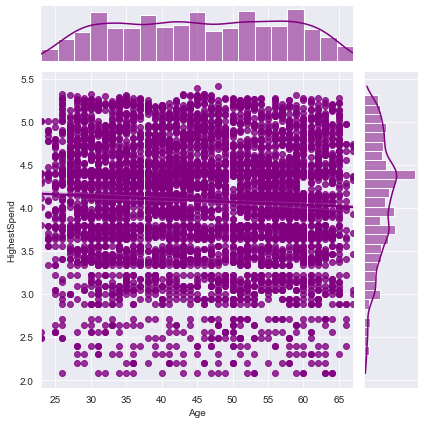

Correlation between Age and HiddenScore ==>  -0.04641766358559727


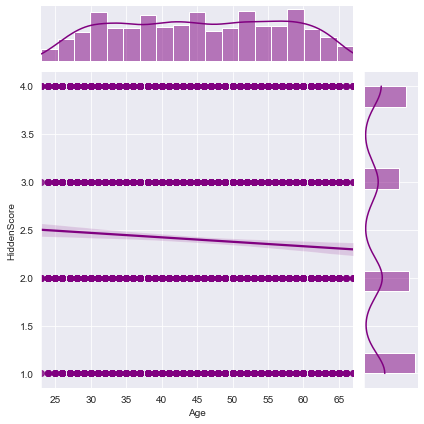

Correlation between Age and MonthlyAverageSpend ==>  -0.04724625145293547


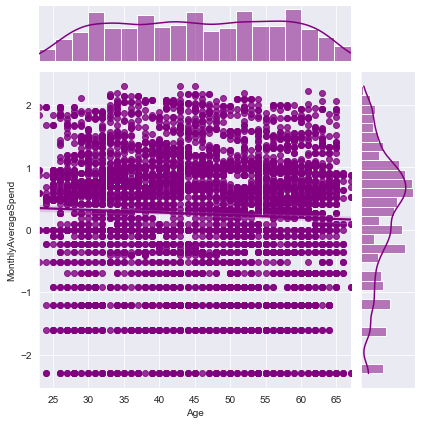

Correlation between Age and Level ==>  0.0413343833606359


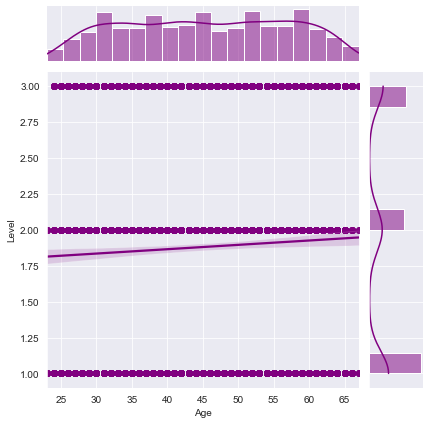

Correlation between Age and Mortgage ==>  -0.010223214650500835


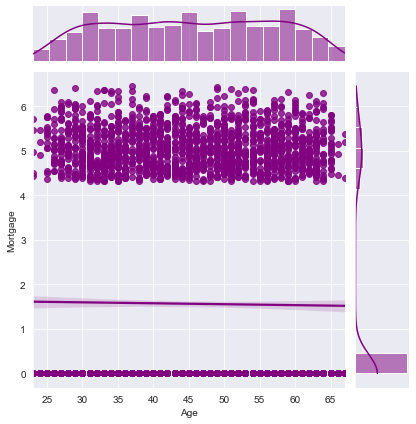

Correlation between Age and Security ==>  -0.0004362422234354082


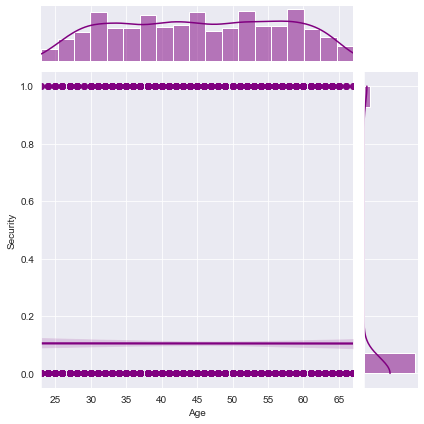

Correlation between Age and FixedDepositAccount ==>  0.008042552147186799


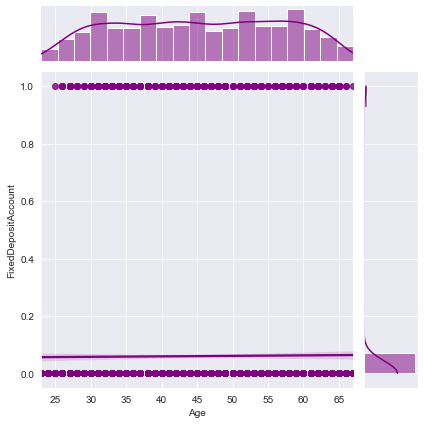

In [106]:
cols=['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount']
plt.figure(dpi = 100, figsize = (5,4))
print("*== Joint plot of Age with Other Variables ==* \n")
for i in cols:
    if i != 'Age':
        print(f"Correlation between Age and {i} ==> ",p2data.corr().loc['Age'][i])
        sns.jointplot(x='Age',y=i,data=p2data,kind = 'reg',color = 'purple')
        plt.show()

Age is Having negative correlation with all varaibles except Customersince

*== Joint plot of HighestSpend with Other Variables ==* 

Correlation between HighestSpend and Age ==>  -0.057391766907997556


<Figure size 500x400 with 0 Axes>

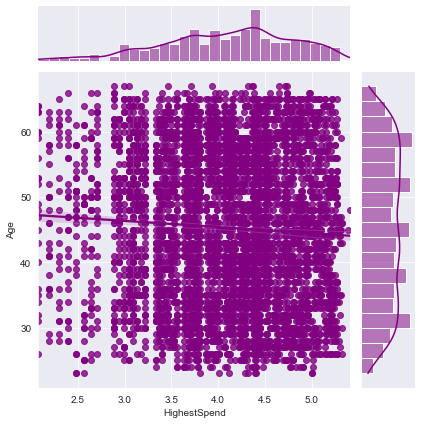

Correlation between HighestSpend and CustomerSince ==>  -0.055870413126274554


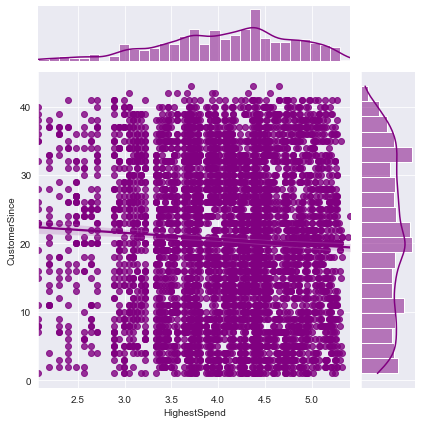

Correlation between HighestSpend and HiddenScore ==>  -0.12289953814143274


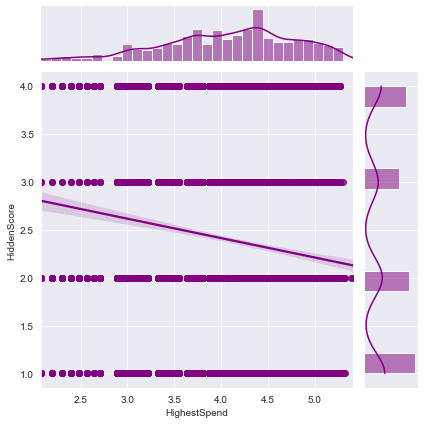

Correlation between HighestSpend and MonthlyAverageSpend ==>  0.5699055154261568


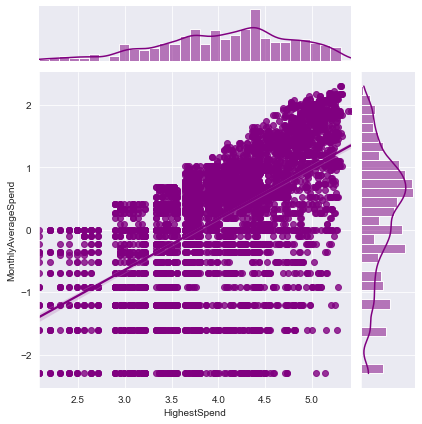

Correlation between HighestSpend and Level ==>  -0.16143772032065287


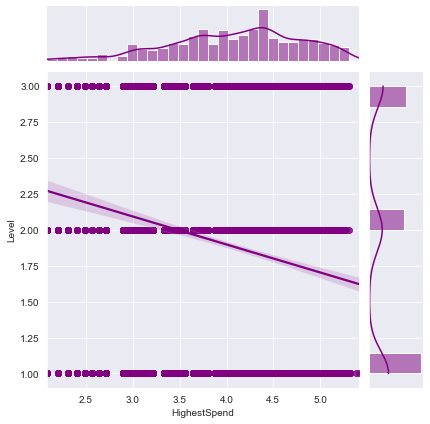

Correlation between HighestSpend and Mortgage ==>  0.02810664054393185


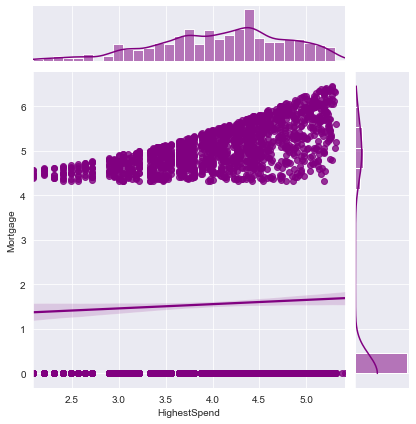

Correlation between HighestSpend and Security ==>  -4.12618518163471e-06


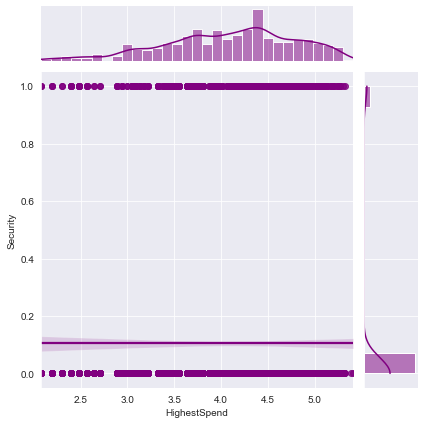

Correlation between HighestSpend and FixedDepositAccount ==>  0.13283891550930804


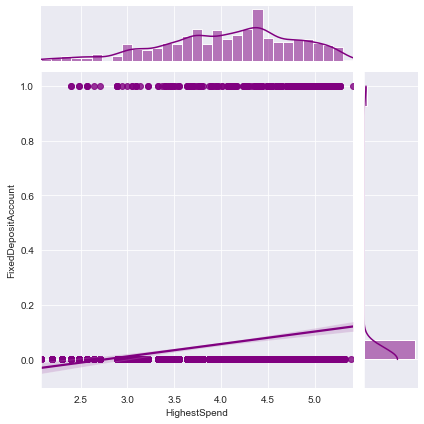

In [107]:
cols=['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount']
plt.figure(dpi = 100, figsize = (5,4))
print("*== Joint plot of HighestSpend with Other Variables ==* \n")
for i in cols:
    if i != 'HighestSpend':
        print(f"Correlation between HighestSpend and {i} ==> ",p2data.corr().loc['HighestSpend'][i])
        sns.jointplot(x='HighestSpend',y=i,data=p2data,kind = 'reg',color = 'purple')
        plt.show()

HighestSpend is linearly associated with MonthlyAverageSpend and Mortgage.

Its negatively correalting with all remaining varaibles

*== Joint plot of Mortgage with Other Variables ==* 

Correlation between Mortgage and Age ==>  -0.010223214650500835


<Figure size 500x400 with 0 Axes>

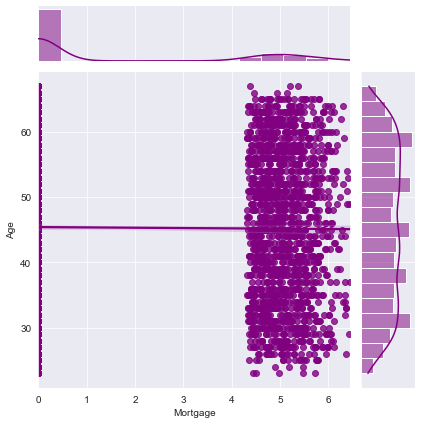

Correlation between Mortgage and CustomerSince ==>  -0.016862606993554775


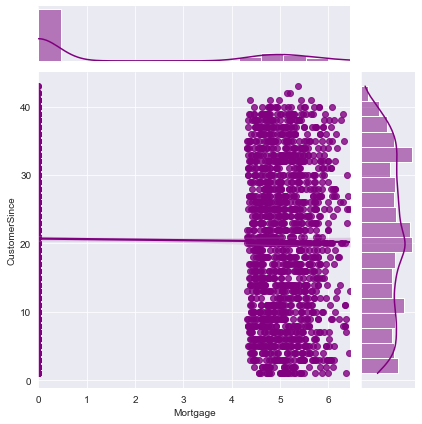

Correlation between Mortgage and HighestSpend ==>  0.02810664054393185


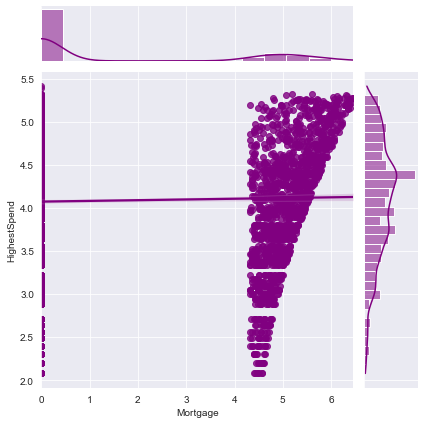

Correlation between Mortgage and HiddenScore ==>  0.00034589391732553395


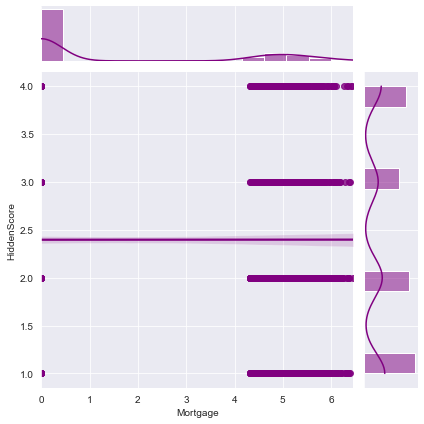

Correlation between Mortgage and MonthlyAverageSpend ==>  0.008333221695163593


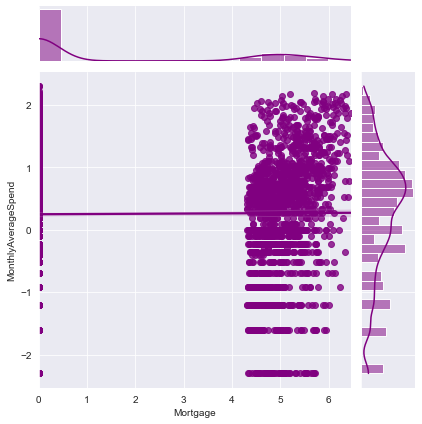

Correlation between Mortgage and Level ==>  -0.006892948574493506


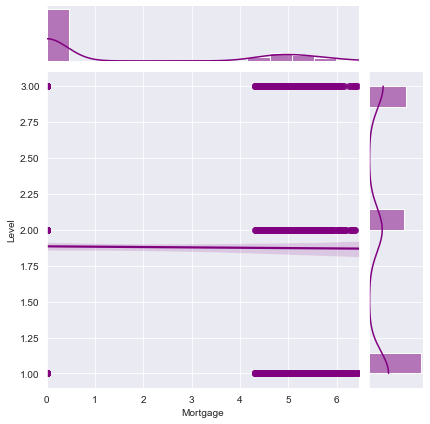

Correlation between Mortgage and Security ==>  -0.003113773876347822


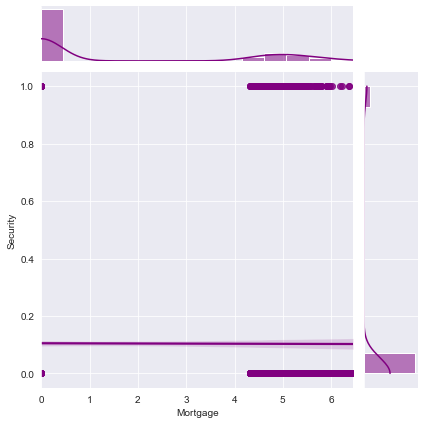

Correlation between Mortgage and FixedDepositAccount ==>  0.050313305675578096


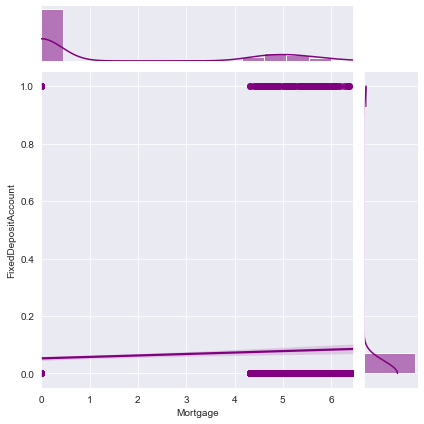

In [108]:
cols=['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount']
plt.figure(dpi = 100, figsize = (5,4))
print("*== Joint plot of Mortgage with Other Variables ==* \n")
for i in cols:
    if i != 'Mortgage':
        print(f"Correlation between Mortgage and {i} ==> ",p2data.corr().loc['Mortgage'][i])
        sns.jointplot(x='Mortgage',y=i,data=p2data,kind = 'reg',color = 'purple')
        plt.show()

Mortgage has negative correlation with all varaibles except MonthlyAverageSpend and HighestSpend.

Mortgage has weak linear relationship associated with MonthlyAverageSpend and HighestSpend

*== Joint plot of Level with Other Variables ==* 

Correlation between Level and Age ==>  0.0413343833606359


<Figure size 500x400 with 0 Axes>

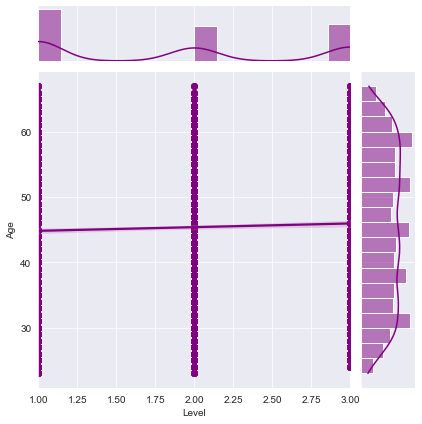

Correlation between Level and CustomerSince ==>  0.027075631493873757


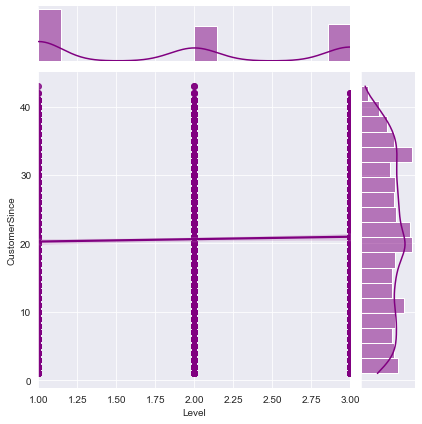

Correlation between Level and HighestSpend ==>  -0.16143772032065287


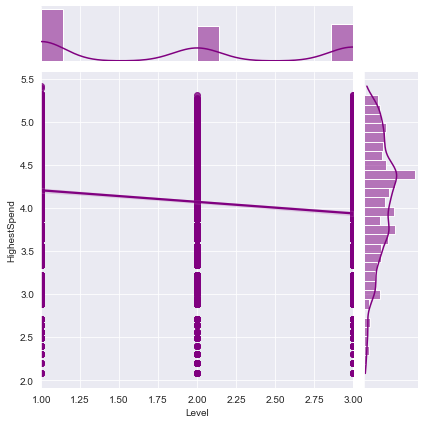

Correlation between Level and HiddenScore ==>  0.06492891355580874


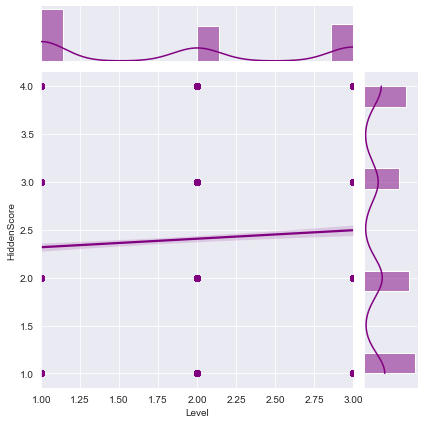

Correlation between Level and MonthlyAverageSpend ==>  -0.08689258143766092


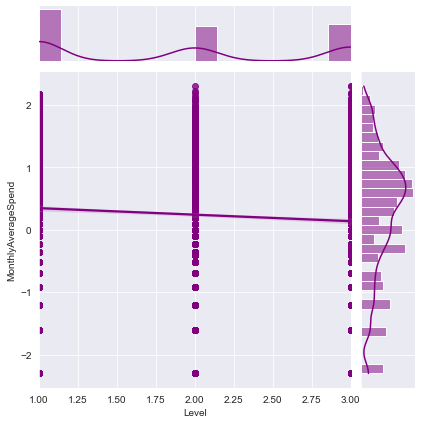

Correlation between Level and Mortgage ==>  -0.006892948574493506


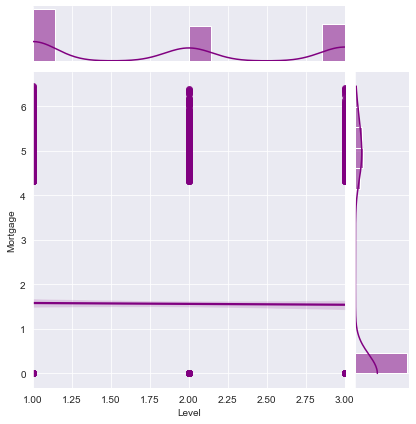

Correlation between Level and Security ==>  -0.010812013603975237


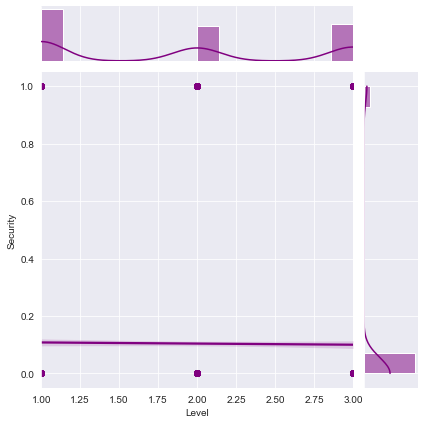

Correlation between Level and FixedDepositAccount ==>  0.013933888212946884


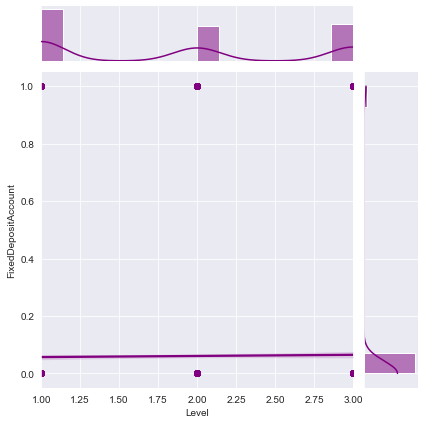

In [109]:
cols=['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount']
plt.figure(dpi = 100, figsize = (5,4))
print("*== Joint plot of Level with Other Variables ==* \n")
for i in cols:
    if i != 'Level':
        print(f"Correlation between Level and {i} ==> ",p2data.corr().loc['Level'][i])
        sns.jointplot(x='Level',y=i,data=p2data,kind = 'reg',color = 'purple')
        plt.show()

Level is negatively correlated with Age and HighestSpend
Level is positively correlated with 'CustomerSince', 'HiddenScore','MonthlyAverageSpend', 'Mortgage', 'Security', 'FixedDepositAccount

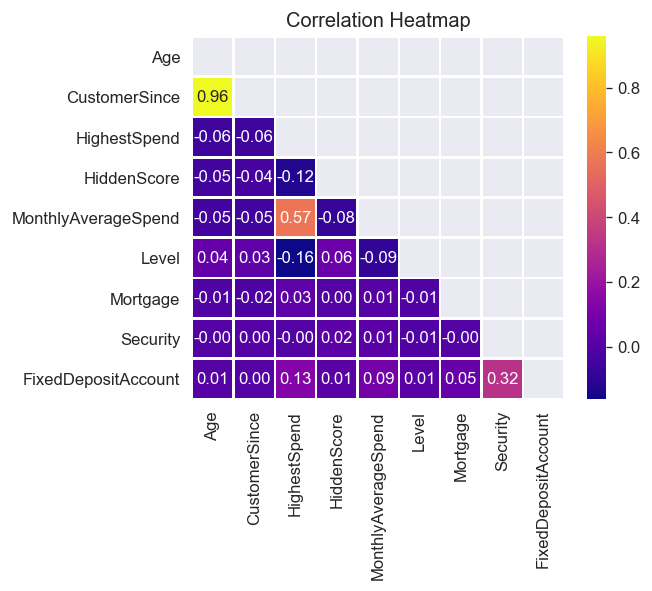

In [110]:
sns.set_style('darkgrid')
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(p2data.corr(),dtype = bool))
sns.heatmap(p2data.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

variables are not isolating with each other except age and Customersince. Lets Drop Customersince column

In [111]:
p2data.drop(['CustomerSince'],axis=1,inplace=True)

In [112]:
p2data.columns

Index(['Age', 'HighestSpend', 'HiddenScore', 'MonthlyAverageSpend', 'Level',
       'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

#Segregate Predictors vs target varaibles

From dataset we have 10
predictor variables which can be used in determining target varaible 'LoanOnCard'

In [113]:
p2data["LoanOnCard"].value_counts(normalize=True)

#can observe lot of imbalance in target class

0.0    0.904
1.0    0.096
Name: LoanOnCard, dtype: float64

In [114]:
p2data["LoanOnCard"].value_counts(normalize=False)

#can observe lot of imbalance in target class

0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64

In [115]:

from sklearn.utils import resample

# Separate majority and minority classes
p2data_major = p2data[p2data["LoanOnCard"]==0]
p2data_minor = p2data[p2data["LoanOnCard"]==1]
 
# Upsample minority class
p2data_minor_sampled = resample(p2data_minor, 
                                 replace=True,     # sample with replacement
                                 n_samples=4520,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
p2data_sampled = pd.concat([p2data_major, p2data_minor_sampled])
 
# Display new class counts
p2data_sampled.LoanOnCard.value_counts()

1.0    4520
0.0    4520
Name: LoanOnCard, dtype: int64

In [116]:
p2data_sampled.head(5)

Age  HighestSpend  HiddenScore  MonthlyAverageSpend  Level  Mortgage  \
0   25      3.891820            4             0.470004      1       0.0   
1   45      3.526361            3             0.405465      1       0.0   
2   39      2.397895            1             0.000000      1       0.0   
3   35      4.605170            1             0.993252      2       0.0   
4   35      3.806662            4             0.000000      2       0.0   

   Security  FixedDepositAccount InternetBanking CreditCard LoanOnCard  
0         1                    0               0          0          0  
1         1                    0               0          0          0  
2         0                    0               0          0          0  
3         0                    0               0          0          0  
4         0                    0               0          1          0

In [135]:
from sklearn.model_selection import train_test_split

X = p2data_sampled.drop('LoanOnCard',axis=1)     # Predictor feature columns

Y = p2data_sampled['LoanOnCard']                 # Predicted class 
Y=Y.astype(int)


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

Age  HighestSpend  HiddenScore  MonthlyAverageSpend  Level  Mortgage  \
3757   45      4.955827            1             0.336472      2  0.000000   
321    44      4.615121            3             1.481605      2  4.406719   
2533   54      4.709530            1             0.095310      2  0.000000   
4532   48      4.890349            2             1.131402      2  0.000000   
1589   57      4.820282            1            -1.609438      2  0.000000   

      Security  FixedDepositAccount InternetBanking CreditCard  
3757         0                    0               1          0  
321          0                    0               0          0  
2533         0                    0               1          0  
4532         0                    0               1          0  
1589         0                    0               1          0

In [136]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (6328, 10)
y_train shape:  (6328,)
x_test shape:  (2712, 10)
y_test shape:  (2712,)


In [137]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(p2data_sampled.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(p2data_sampled.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [138]:
print("Original LoanOnCard True Values    : {0} ({1:0.2f}%)".format(len(p2data_sampled.loc[p2data_sampled['LoanOnCard'] == 1]), (len(p2data_sampled.loc[p2data_sampled['LoanOnCard'] == 1])/len(p2data_sampled.index)) * 100))
print("Original LoanOnCard False Values   : {0} ({1:0.2f}%)".format(len(p2data_sampled.loc[p2data_sampled['LoanOnCard'] == 0]), (len(p2data_sampled.loc[p2data_sampled['LoanOnCard'] == 0])/len(p2data_sampled.index)) * 100))
print("")
print("Training LoanOnCard True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training LoanOnCard False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test LoanOnCard True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test LoanOnCard False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original LoanOnCard True Values    : 4520 (50.00%)
Original LoanOnCard False Values   : 4520 (50.00%)

Training LoanOnCard True Values    : 3170 (50.09%)
Training LoanOnCard False Values   : 3158 (49.91%)

Test LoanOnCard True Values        : 1350 (49.78%)
Test LoanOnCard False Values       : 1362 (50.22%)



# Train Naive Bayes

In [139]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
model = GaussianNB()

model.fit(x_train, y_train.ravel())

GaussianNB()

In [140]:
#Performance of model with training data
train_predict = model.predict(x_train)

from sklearn import metrics

print("Model Accuracy with Train Data: {0:.4f}".format(metrics.accuracy_score(y_train, train_predict)))
print()

#Performance of model with test data
test_predict = model.predict(x_test)

print("Model Accuracy with Test Data: {0:.4f}".format(metrics.accuracy_score(y_test, test_predict)))
print()

Model Accuracy with Train Data: 0.8747

Model Accuracy with Test Data: 0.8691



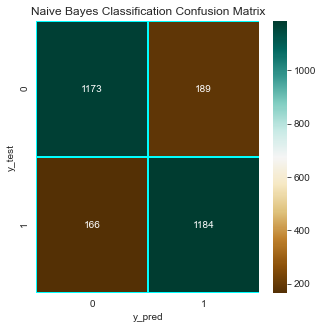

In [141]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
nb_cm = confusion_matrix(y_test, test_predict)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nb_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

# Train Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression

# Fit the model on train
lrmodel = LogisticRegression(solver="liblinear")
lrmodel.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [143]:
#Performance of model with training data
lrtrain_predict = model.predict(x_train)

print("Model Accuracy with Train Data: {0:.4f}".format(metrics.accuracy_score(y_train, lrtrain_predict)))
print()

#Performance of model with test data
lrtest_predict = model.predict(x_test)

print("Model Accuracy with Test Data: {0:.4f}".format(metrics.accuracy_score(y_test, lrtest_predict)))
print()

Model Accuracy with Train Data: 0.8747

Model Accuracy with Test Data: 0.8691



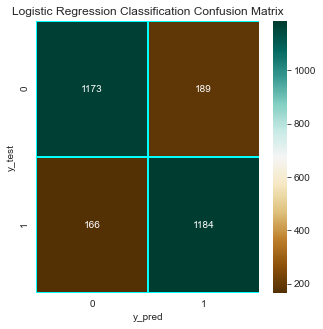

In [144]:
from sklearn.metrics import confusion_matrix

#Creating the confusion matrix:

lr_cm = confusion_matrix(y_test, lrtest_predict)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lr_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [145]:
#classification Report

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

print(classification_report(y_test,lrtest_predict))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1362
           1       0.86      0.88      0.87      1350

    accuracy                           0.87      2712
   macro avg       0.87      0.87      0.87      2712
weighted avg       0.87      0.87      0.87      2712



Precision – What percent of your predictions were correct
Recall – What percent of the positive cases did you catch
F1 score – What percent of positive predictions were correct
support is the number of occurence of the given class in your dataset

For Zero(people who dont take loan), We have 88% predictions(Precision) correct and able to caught 86%(Recall) positive cases correctly and 87%(F1 Score) of postive predictions are correct

For One(people who took loan), We have 86% predictions(Precision) correct and able to caught 88%(Recall) positive cases correctly and 87%(F1 Score) of postive predictions are correct

Support numbers- For every 2712 occurences we have 1362 zero occurances
                                                 1350 one occurances
            
Overall accuracy is 87%

In [129]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.904056 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.904019 (0.008011) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.892035 (0.017438) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.904019 (0.008097) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.904056 (0.007987) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.887684 (0.017550) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.903392 (0.008402) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.903798 (0.007943) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.893031 (0.019235) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.903355 (0.008930) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.902028 (0.007657) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.895907 (0.012803) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.876069 (0.009904) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.896276 (0.008047) with

In [131]:
# example of grid searching key hyperparametres for ridge classifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

X = p2data_sampled.drop('LoanOnCard',axis=1)     # Predictor feature columns

Y = p2data_sampled['LoanOnCard']                 # Predicted class 
Y=Y.astype(int)

# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.893879 using {'alpha': 0.9}
0.893842 (0.006993) with: {'alpha': 0.1}
0.893842 (0.006993) with: {'alpha': 0.2}
0.893842 (0.006993) with: {'alpha': 0.3}
0.893842 (0.006993) with: {'alpha': 0.4}
0.893805 (0.007072) with: {'alpha': 0.5}
0.893842 (0.006993) with: {'alpha': 0.6}
0.893842 (0.006993) with: {'alpha': 0.7}
0.893842 (0.006993) with: {'alpha': 0.8}
0.893879 (0.007019) with: {'alpha': 0.9}
0.893879 (0.007019) with: {'alpha': 1.0}


Conclusion:
    NavvieBayes and Logistic Regression models performed best and given same accurate scores
    
Model Accuracy with Train Data: 0.8747
Model Accuracy with Test Data: 0.8691

Aplied GriDsearchCv and RidgClassifier for tuning model
GridSearchCV - Best: 0.904056 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
RidgeCalssifier - Best: 0.893879 using {'alpha': 0.9}
    
Model accuracy got increased to 90% with GridSearchCV tuning

From Data observed that large customer base is using InternetBanking and bank can target these cusotmers with some promotional offers to increase the conversion ratio to double digit 

Imporvements / Suggessions:
    Biggest problem faced is problem statement.Felt like problem statement can be phrased in better manner. Striggled to identify Target Column
    
Target class data is imbalanced.To make good model added sampledata using resample and predicted the scores of model.